# STEPS FOLLOWED 

# PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Importing Necessary Python Libraries

In [689]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [690]:
#To Supress warnings
import warnings
warnings.filterwarnings ("ignore")

# Importing and Reading the Data

In [691]:
leads_df = pd.read_csv("Leads.csv")

# General Characteristics of Dataframe leads_df

In [692]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [693]:
leads_df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [694]:
leads_df.shape

(9240, 37)

9240 Rows and 37 columns

In [695]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [696]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [697]:
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Checking unique values of all columns of leads_df 

In [698]:
for i in leads_df.columns:
    unique_values = leads_df[i].unique()
    print(f"Unique values in '{i}':")
    print(unique_values)
    print()  

Unique values in 'Prospect ID':
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

Unique values in 'Lead Number':
[660737 660728 660727 ... 579545 579538 579533]

Unique values in 'Lead Origin':
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Unique values in 'Lead Source':
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Unique values in 'Do Not Email':
['No' 'Yes']

Unique values in 'Do Not Call':
['No' 'Yes']

Unique values in 'Converted':
[0 1]

Unique values in 'TotalVisits':
[  0.   5.   2.   1.   4.   8.  11.   6.  

# In Some Categorical Columns, I noticed values like "Select".This needs to be treated or handled as a null value.

In [699]:
# Converting 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

# Checking The Missing Values Present in the columns of leads_df

In [700]:
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Checking the Missing Values Percentage (%)

In [701]:
round(100*leads_df.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# We should drop the Columns which are having Missing Values > 40% . Let's Make a list containing variables which has missing values greater than 40%

In [702]:
columns_to_be_dropped = list(leads_df.columns[100*leads_df.isnull().mean()>40])
print(columns_to_be_dropped )
len(columns_to_be_dropped )

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


7

'How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' are the 7 columns which are having greater than 40% of Missing values

# Dropping the columns which has > 40% of missing values from "leads_df"

In [703]:
leads_df = leads_df.drop(columns_to_be_dropped,axis=1)

In [704]:
leads_df.shape

(9240, 30)

# After dropping columns which have > 40% of Missing Values, Lets check the missing values of variables again.

In [705]:
round(100*leads_df.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Columns which are having Missing Values are "Lead Source","TotalVisits","Pages Views Per Visit","Last Activity","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","Tags","City".

# Lets do the Imputation of these columns by inspecting these. If the imputation to be done for a categorical variable ,we should use "MODE" and for numerical variable we should use "MEAN"

In [706]:
leads_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

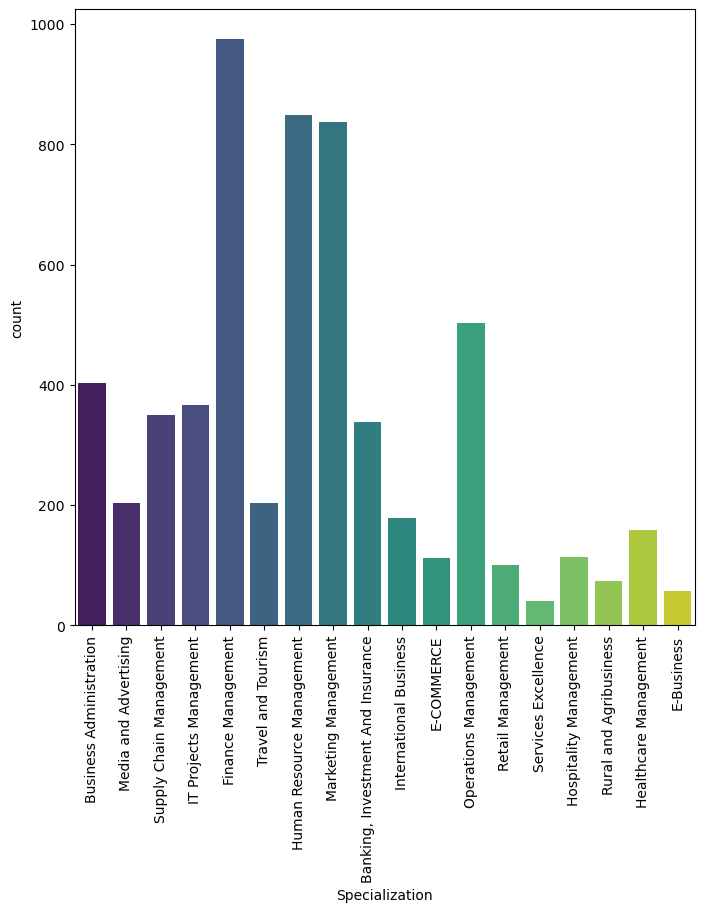

In [707]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["Specialization"], palette="viridis")  
plt.show()

# 36.58% of  missing values present in the Specialization column .It is due to the lead may not belong to the listed specializations. So, let's create a new specialization branch like "Others/Unspecified"

# IMPUTATION PROCESS

In [708]:
# Creating a separate category called 'Others/Unspecified' for this
leads_df["Specialization"] = leads_df["Specialization"].replace(np.nan, "Others/Unspecified")

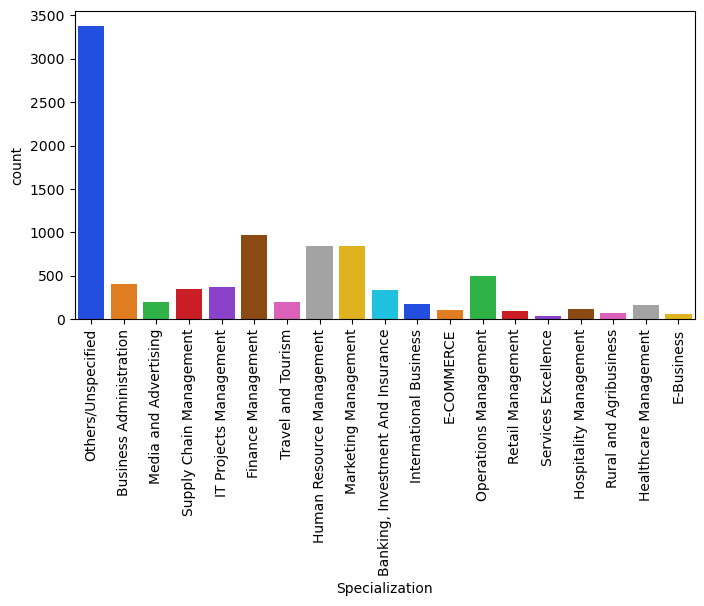

In [709]:
#Lets revisualise the "Specialization" column
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["Specialization"], palette="bright")  
plt.show()

"Others/Unspecified" in "Specialization" has the higher conversion rate when comapared with others.

In [710]:
leads_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#Lets impute missing value to the column "What matters most to you in choosing a course". Better Career Prospects occurs maximum number of times. So, we can impute with that

In [711]:
leads_df["What matters most to you in choosing a course"] = leads_df["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [712]:
leads_df["What matters most to you in choosing a course"] = leads_df["What matters most to you in choosing a course"].apply(
    lambda x: "Better Career Prospects" if pd.isna(x) else x)


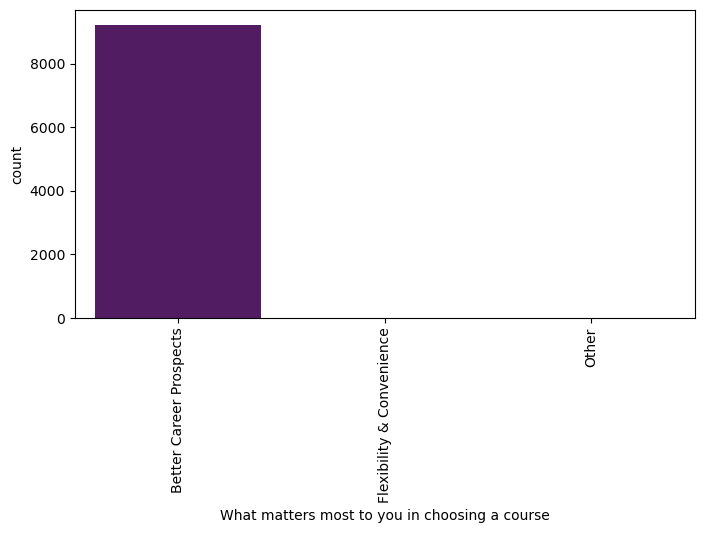

In [713]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["What matters most to you in choosing a course"], palette="inferno")  
plt.show()

 By looking at this countplot above, we can see that data is highly skewed towards "Better Career Prospects".So, I decided to drop this column "What matters most to you in choosing a course" from leads_df dataframe

In [714]:
leads_df = leads_df.drop("What matters most to you in choosing a course",axis=1)

Let's impute "What is your current occupation" which has 29.11% of missing values.

In [715]:
leads_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

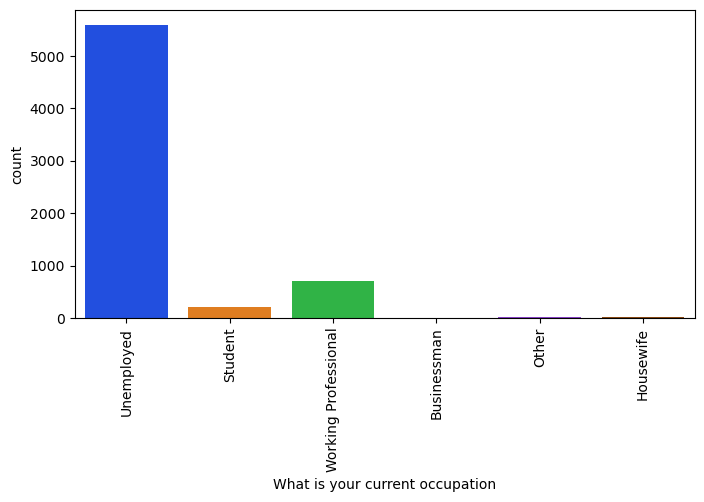

In [716]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["What is your current occupation"], palette="bright")  
plt.show()

 Here, in "What is your current occupation", "Unemployed" has appeared maximum number of times.So let's impute the Unemployed to the missing values of "What is your current occupation".

In [717]:
leads_df["What is your current occupation"] = leads_df["What is your current occupation"].apply(lambda x: "Unemployed" if pd.isna(x) else x)

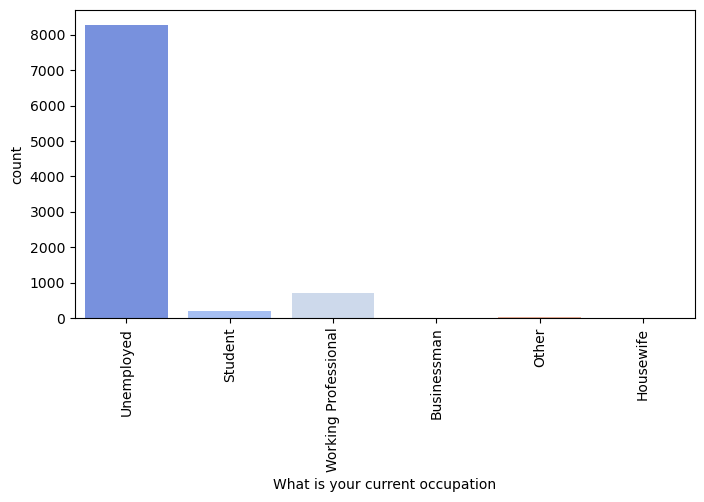

In [718]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["What is your current occupation"], palette="coolwarm")  
plt.show()

Now, Let's impute "City" column which has 39.71 % of missing values.

In [719]:
leads_df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

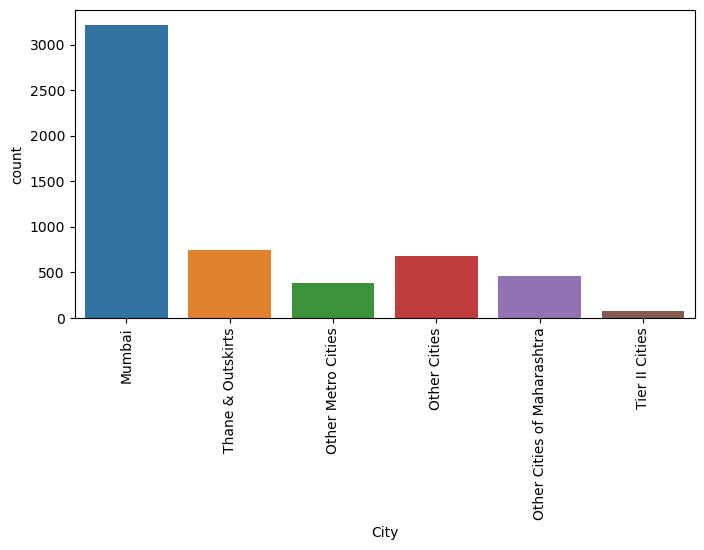

In [720]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["City"], palette="tab10")  
plt.show()

Here in "City" column, we can impute "Mumbai" for missing/null values as it occurs maximum number of times.

In [721]:
leads_df["City"] = leads_df["City"].apply(lambda x: "Mumbai" if pd.isna(x) else x)

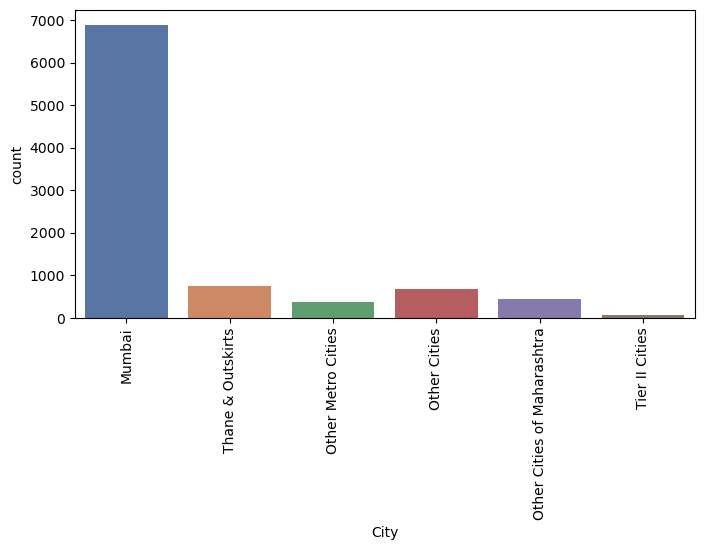

In [722]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["City"], palette="deep")  
plt.show()

Now, let's impute "Tags" column which has 36.29% of Missing Values.

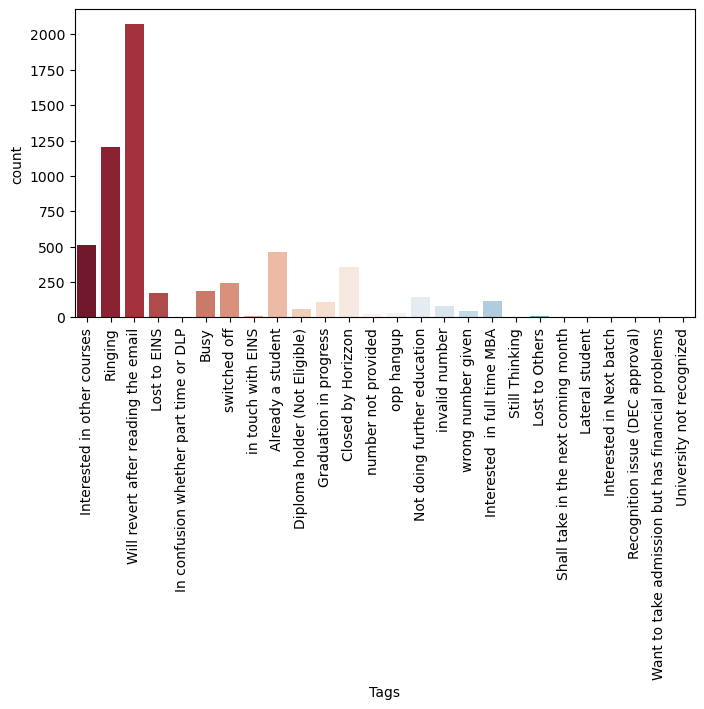

In [723]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["Tags"], palette="RdBu")  
plt.show()

In [724]:
leads_df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Let's impute with "Will revert after reading the email"  for "Tags" column

In [725]:

leads_df["Tags"] = leads_df["Tags"].fillna("Will revert after reading the email")


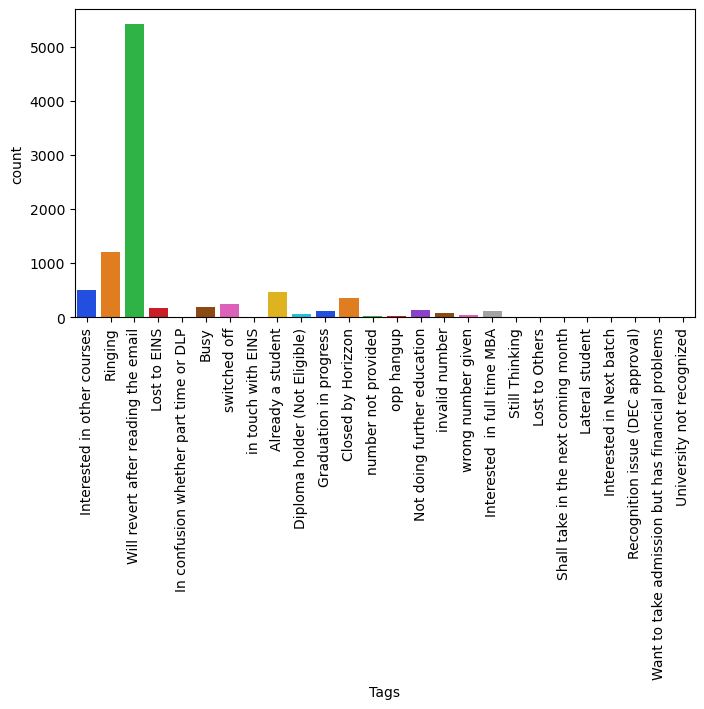

In [726]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x=leads_df["Tags"], palette="bright")  
plt.show()

Now, Let's impute "Country" column as it has 26.63% of Missing values

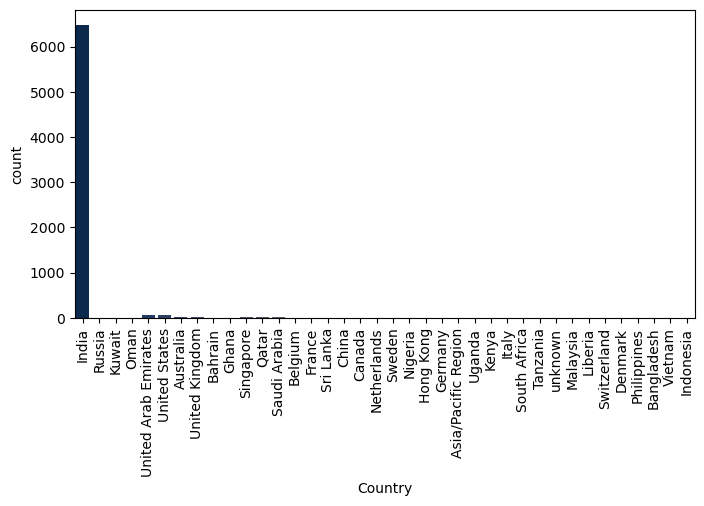

In [727]:
plt.figure(figsize=(8,4))
sns.countplot(x=leads_df["Country"],palette= "cividis")
plt.xticks(rotation=90)
plt.show()

In this above "Country" countplot, the data is highly skewed towards "India".But Country column is very important indicator and informative with respect to the lead.So, We can go for Imputation.

In [728]:
leads_df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

We can Impute with "India" for "Country" column as it is occuring maximum number of times.

In [729]:
leads_df["Country"] = leads_df["Country"].apply(lambda x: "India" if pd.isna(x) else x)

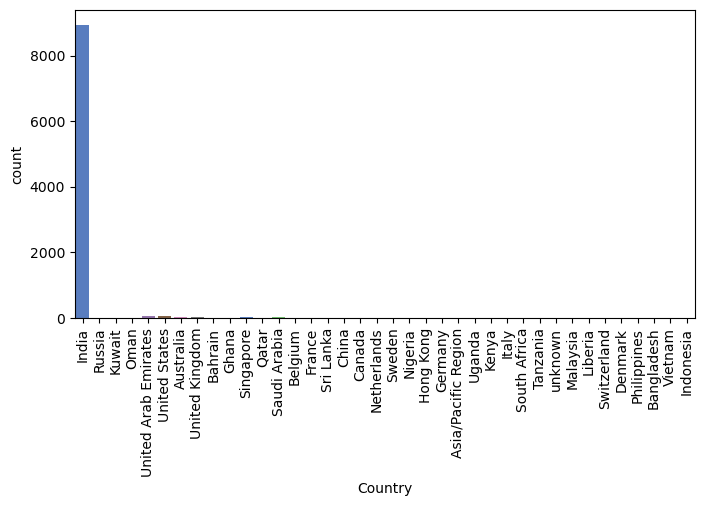

In [730]:
plt.figure(figsize=(8,4))
sns.countplot(x=leads_df["Country"],palette= "muted")
plt.xticks(rotation=90)
plt.show()

# Checking the Missing values/null values percentage after imputation

In [731]:
round(100*leads_df.isnull().mean(),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

3 columns "TotalVisits", "Page Views Per Visit","Last Activity" are having missing values percentage as 1.48%,1.48%,1.11% which are below 2%. So, instead of imputation, I went with dropping of rows

Shape of leads_df before dropping rows with missing/null values.

In [732]:
leads_df.shape

(9240, 29)

Shape of leads_df after dropping rows with missing/null values.

In [733]:
leads_df.dropna(inplace=True)

In [734]:
leads_df.shape

(9074, 29)

Now, Let's check the Missing value percentage of leads_df after imputation and Dropping

In [735]:
round(100*leads_df.isnull().mean(),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [736]:
# Percentage of rows retained after dropping
round((len(leads_df.index)/9240),2)*100

98.0

# We have completed the Imputation process, now let's move to towards Univariate and bivariate and Multivariate analysis

In [737]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [738]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [739]:
categorical_columns_for_analysis = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call','Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
print(categorical_columns_for_analysis)
len(categorical_columns_for_analysis)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


23

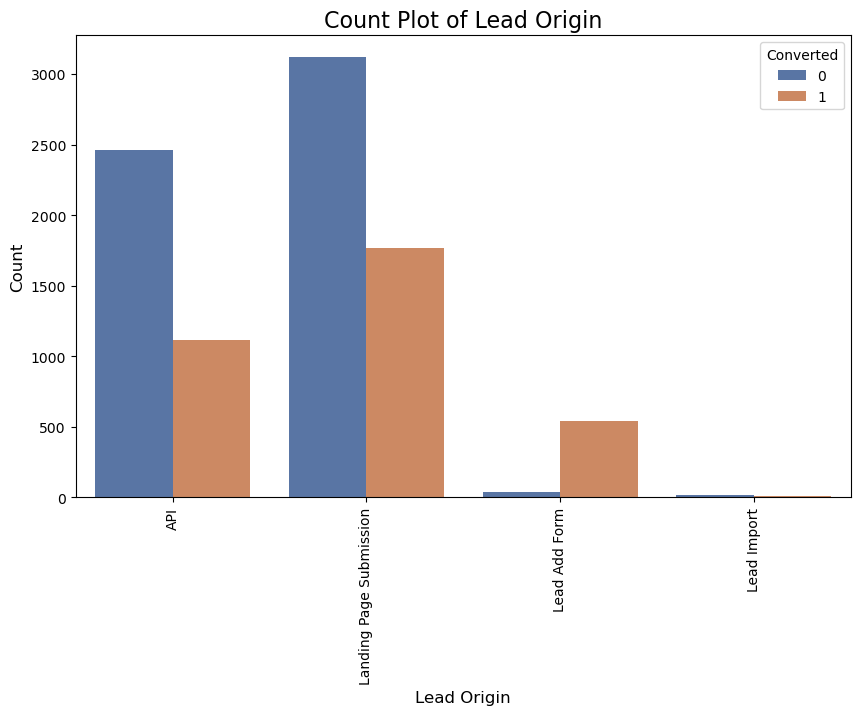

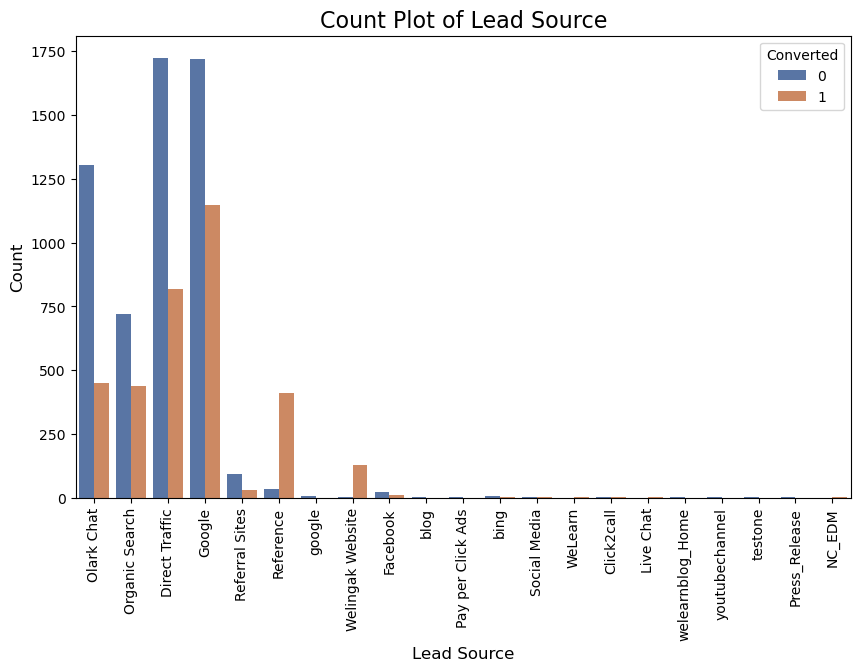

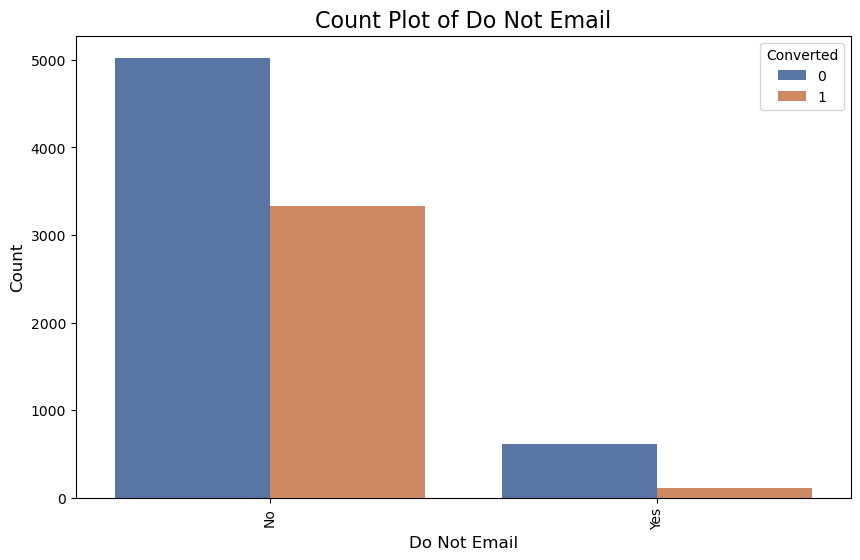

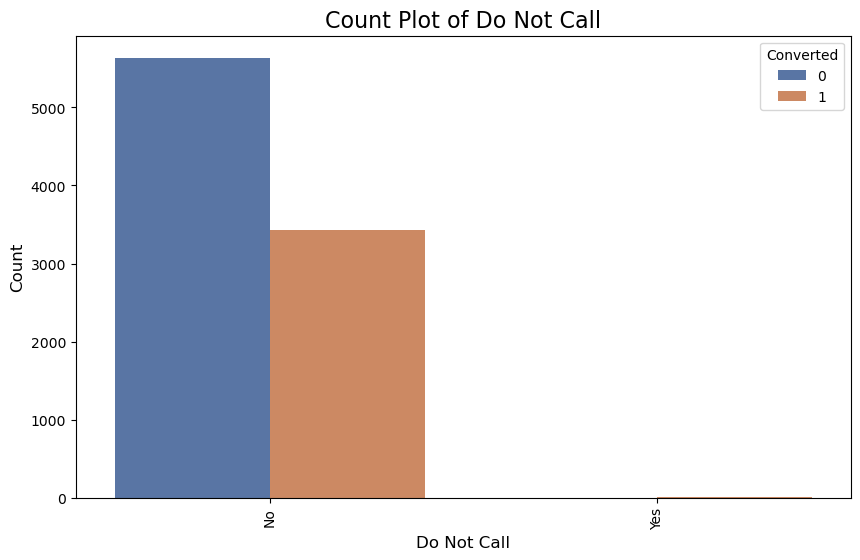

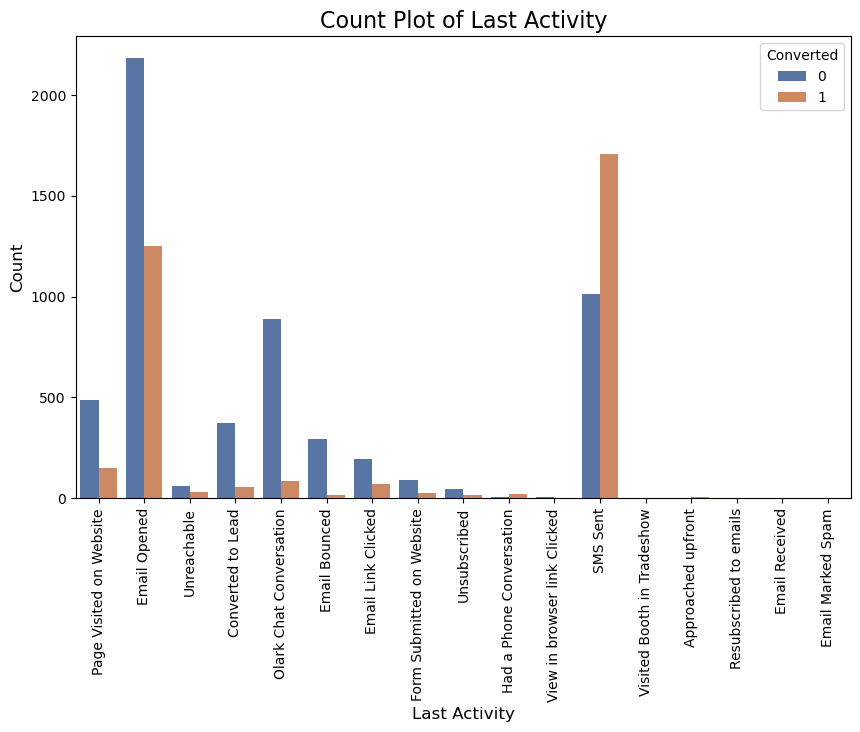

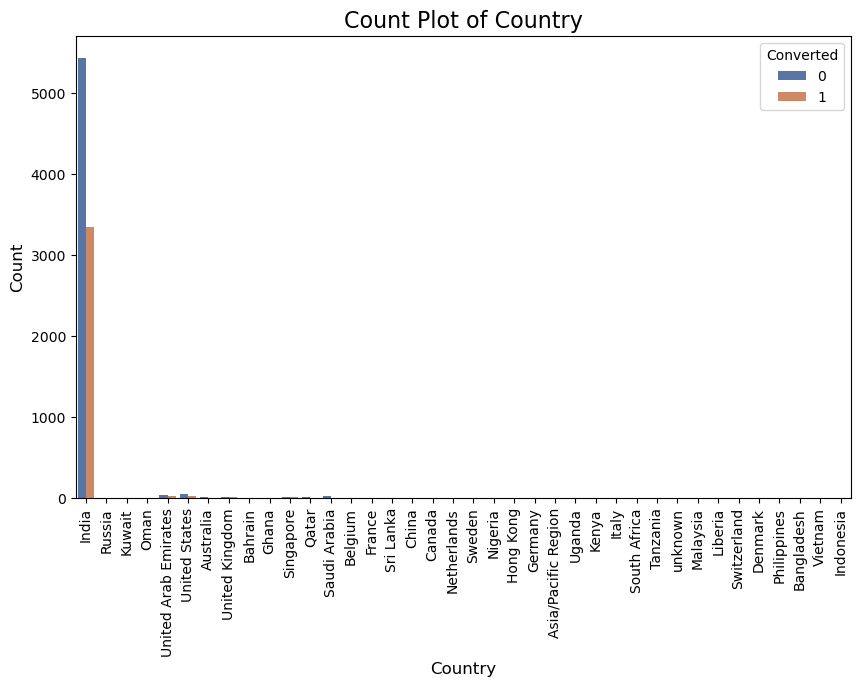

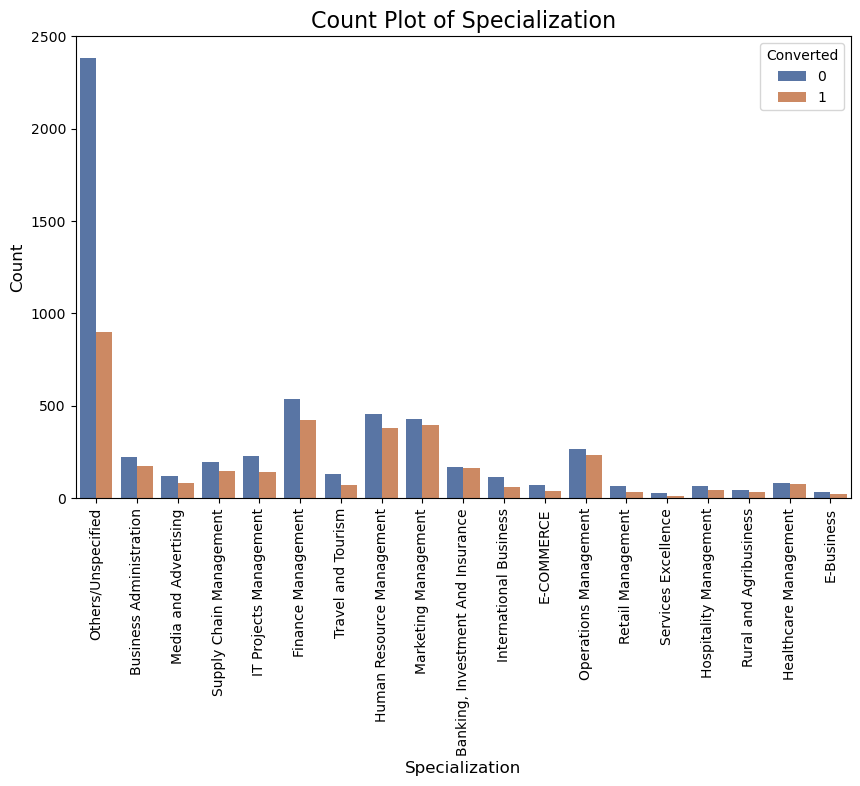

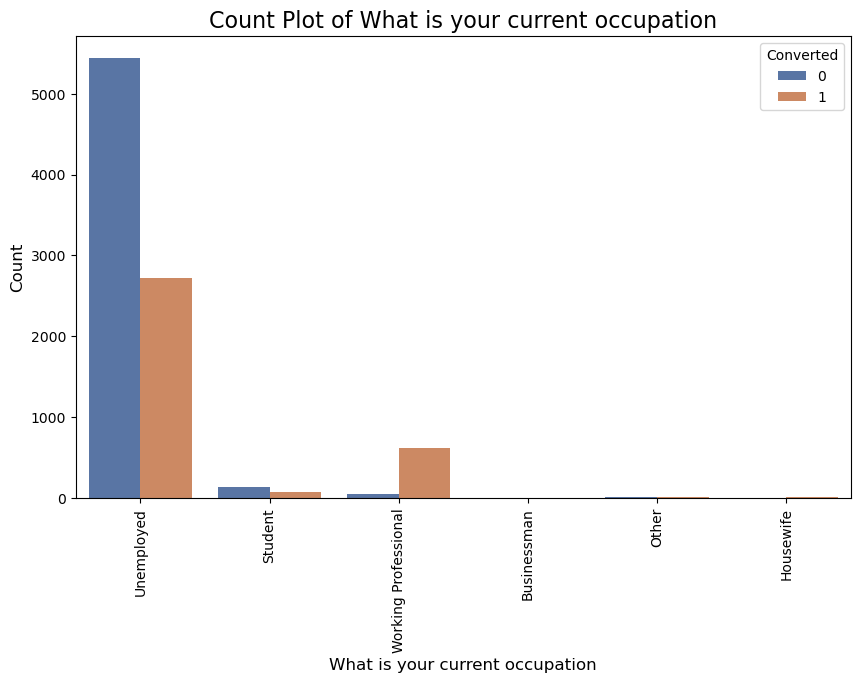

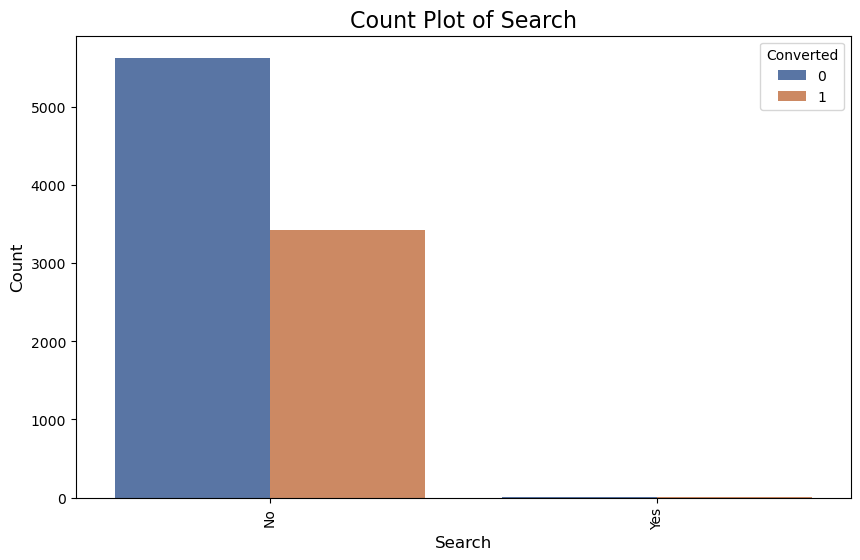

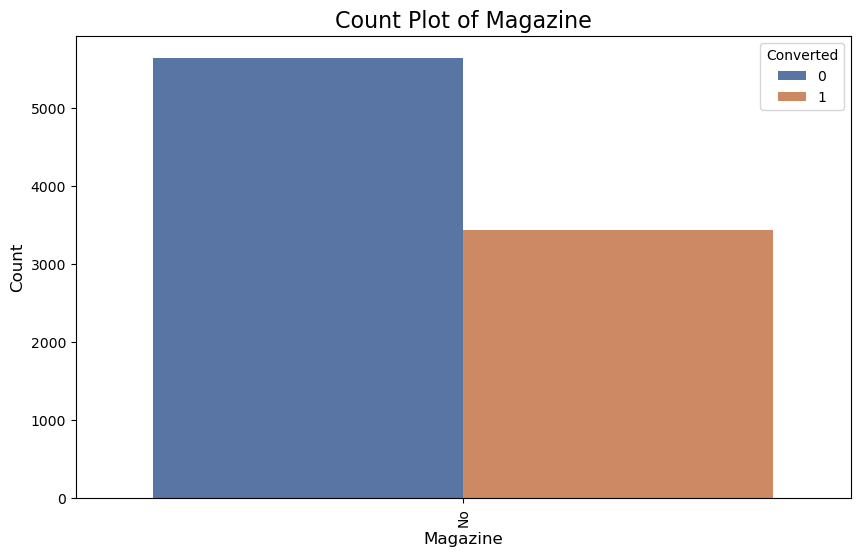

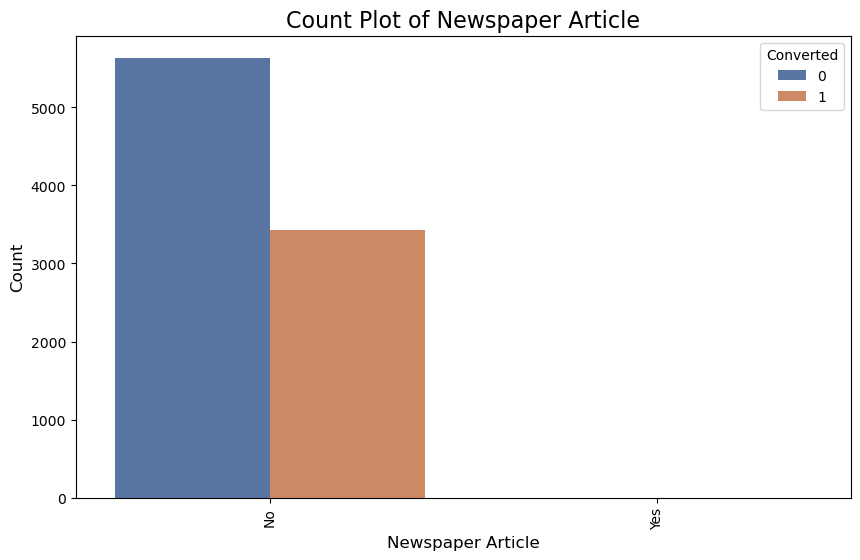

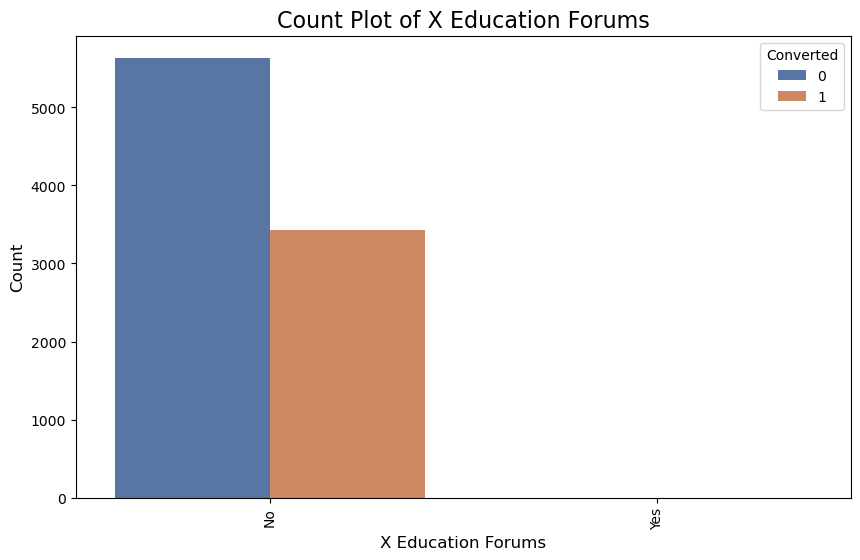

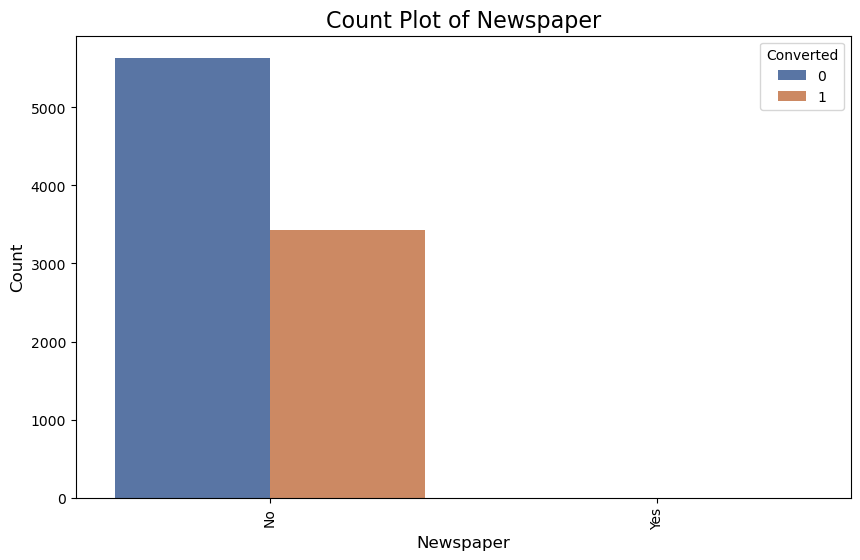

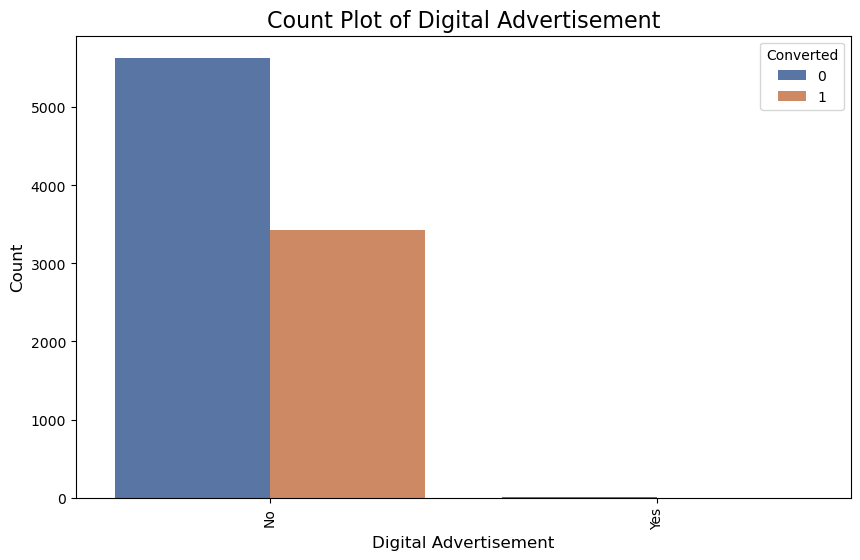

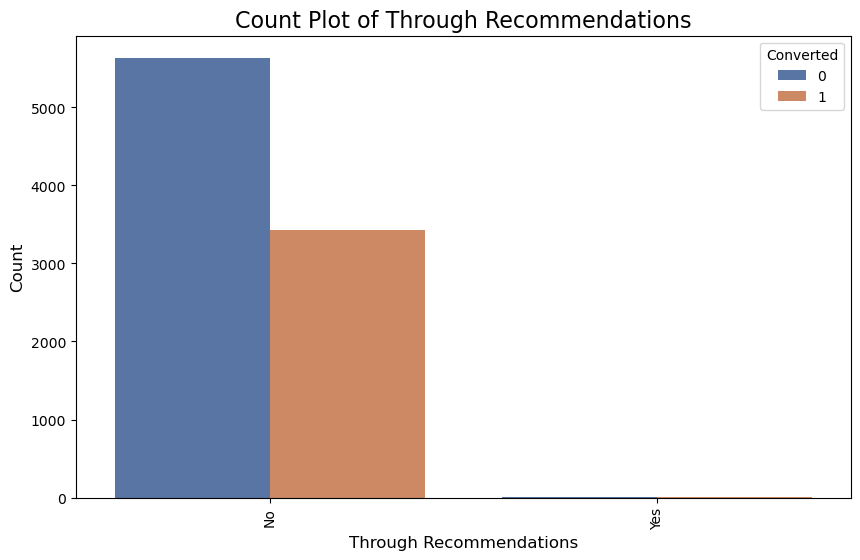

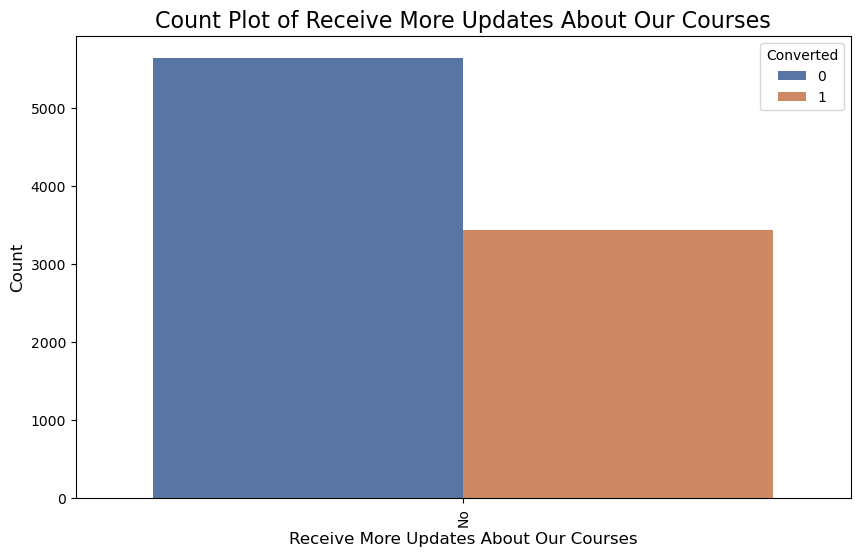

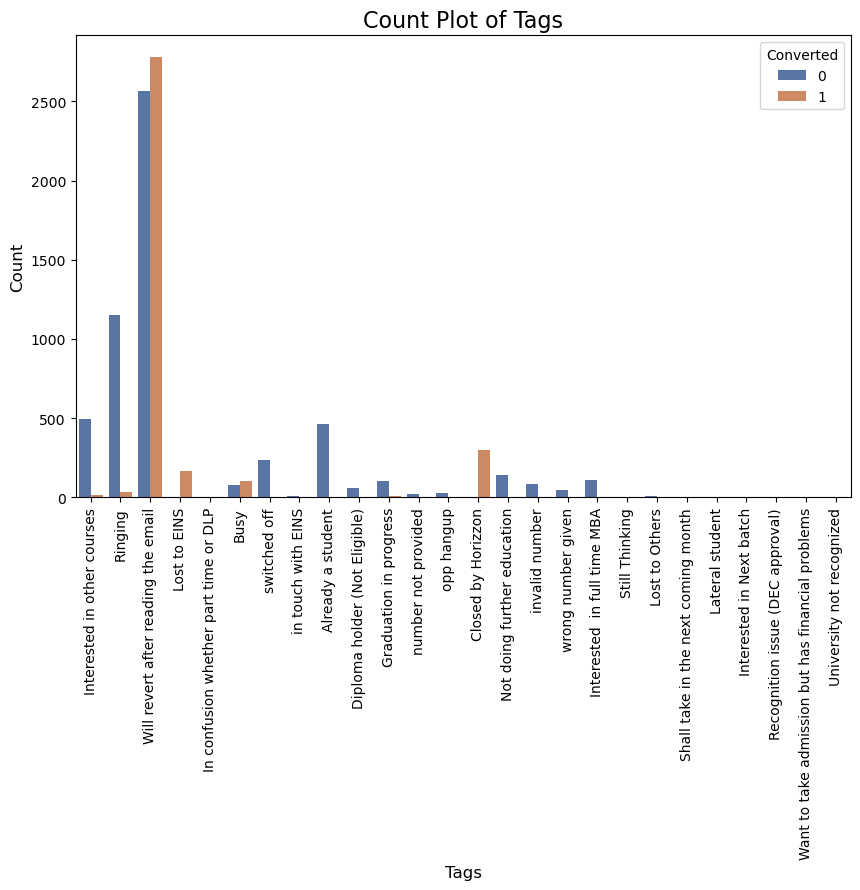

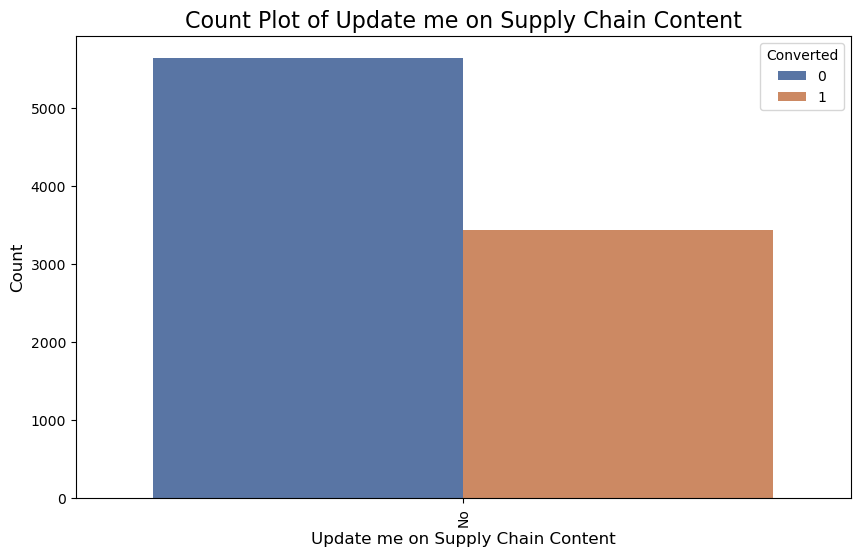

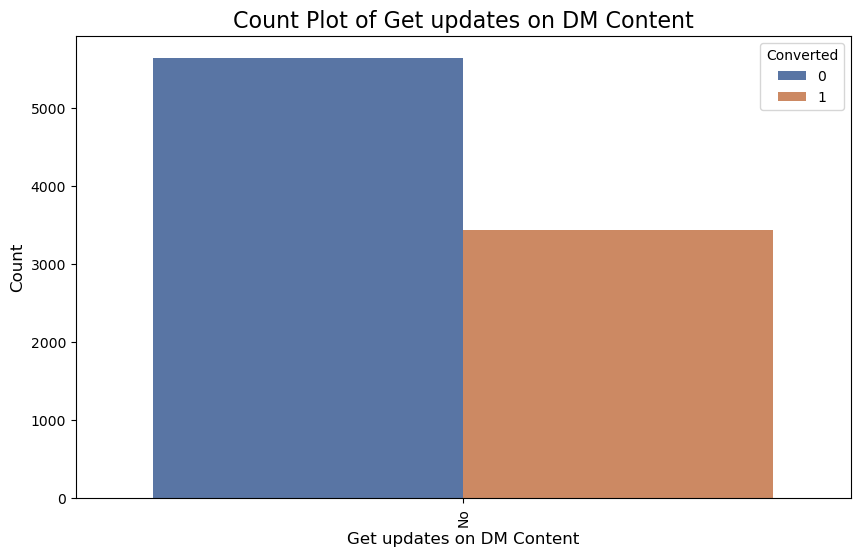

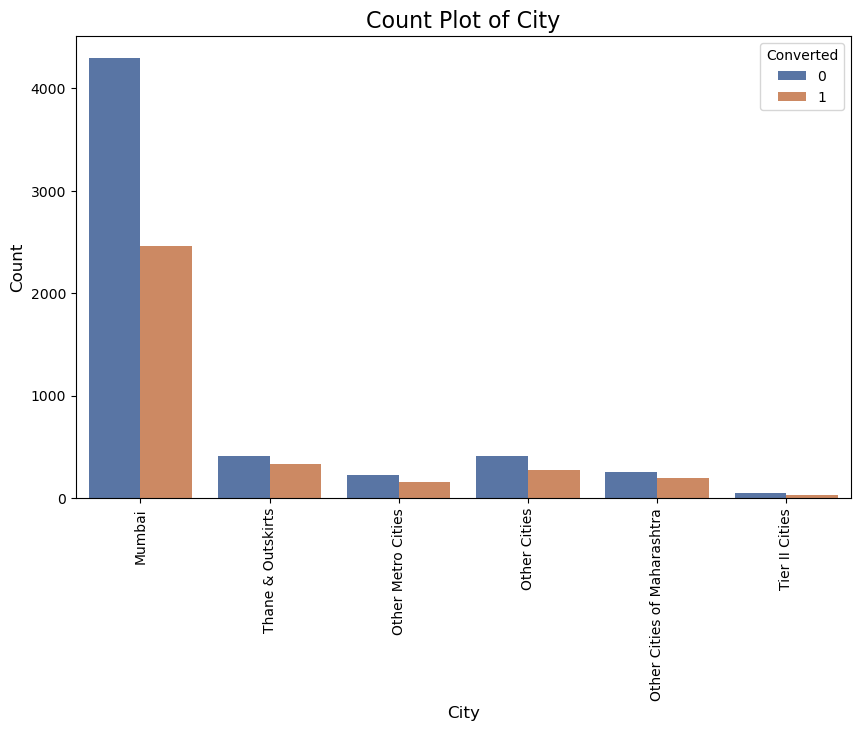

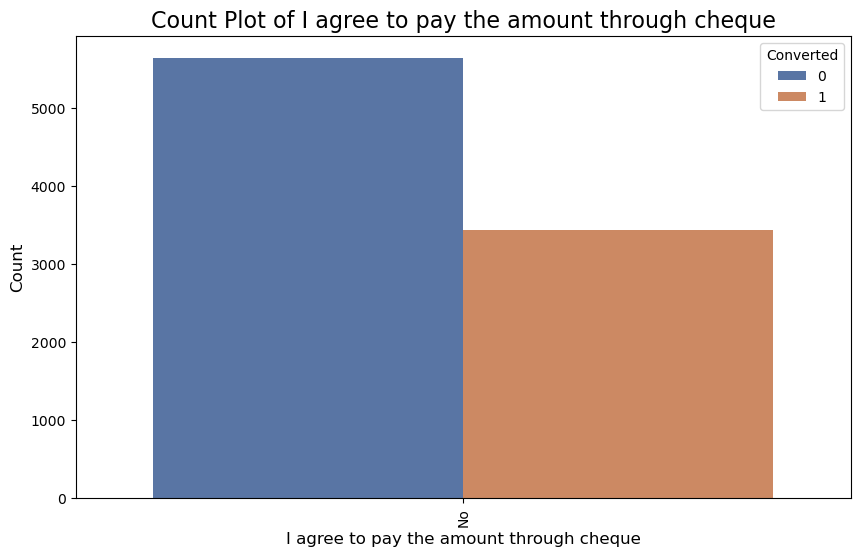

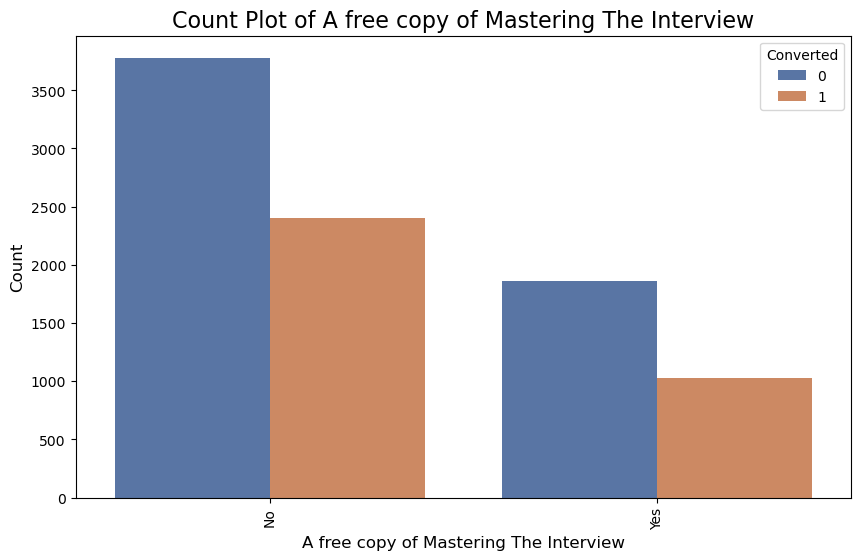

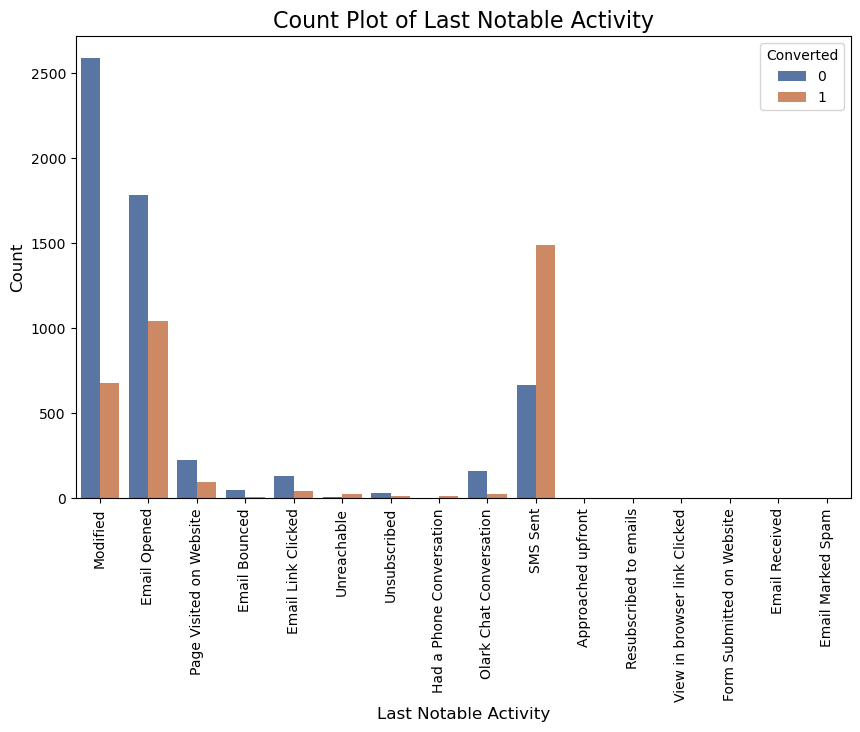

In [740]:
for i in categorical_columns_for_analysis:
    plt.figure(figsize=(10, 6))
    sns.countplot(x= i, hue='Converted', data=leads_df,palette="deep")
    plt.title(f'Count Plot of {i}', fontsize=16)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.show()

I used a for loop to generate univariate analysis of all varibles with respect to target variable "Converted". I will write my inference for these countplots generated.

"Lead Origin" - Higher conversion rate has been noticed on "Landing page submission".Lower conversion was noticed on "Lead add form" and "Lead Import".
"Lead Source" - "Google" resulted in higher conversion when compared with others.
"Do not Email" - "No" exhibited higher conversions when comapred with "Yes".
"Do Not Call" - "No" exhibited higher conversion frequency/counts.
"Last Activity" - Higher counts of conversion noticed in "SMS Sent" and "Email opened".
"Country" - "India" has higher rate of conversion.
"Specialization" - "Others/Unspecified" exhibited higher rate of conversion.
"What is your current occupation"- "Unemployed", "Working professional" have higher conversion rate.
"Search" - "No" has high conversion counts.
"Magazine" - "No" has high conversion counts.
"Newspaper Article" - "No" has high conversion counts.
"X Education Forums" - "No" has high conversion counts.
"Newspaper" - "No" has high conversion counts.
"Digital Advertisement" - "No" has high conversion counts.
"Through Recommendations" - "No" has high conversion counts.
"Receive More Updates About Our Courses" - "No" has high conversion counts.
"Tags" - "Will revert after reading the email" has higher conversion counts.
"Update Me on Supply chain content"- "No" has high conversion counts.
"Get updates on DM Content" - "No" has high conversion counts.
"City" - "Mumbai" has higher conversion counts
"I agree to pay the amount through cheque" - "No" has high conversion counts.
"A free cop of Mastering The Interview" - "No" has high conversion counts.
"Last Notable Activity" - "SMS Sent" displayed higher conversion when compared with others.

In [741]:
# Need to replace 'google' with 'Google'
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')

In [742]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

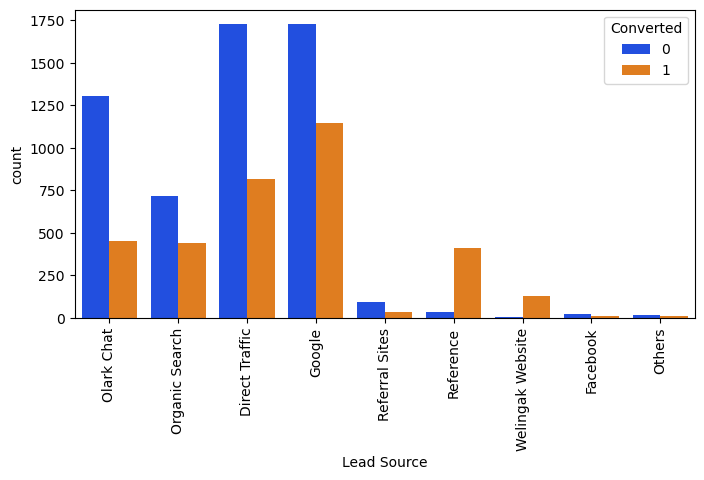

In [743]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x="Lead Source",hue="Converted", palette="bright",data=leads_df)  
plt.show()

In [744]:
# We can club the last activities to "Other_Activity" which are having less data.
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activities')

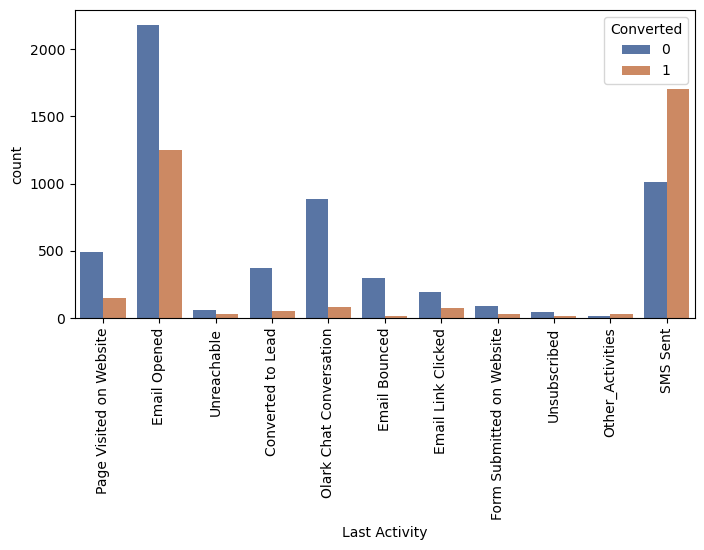

In [745]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x="Last Activity",hue="Converted", palette="deep",data=leads_df)  
plt.show()

In [746]:
leads_df["Specialization"].value_counts()

Others/Unspecified                   3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [747]:
leads_df["Specialization"] = leads_df["Specialization"].replace(['Finance Management', 'Human Resource Management',
                                                       'Marketing Management', 'Operations Management',
                                                       'IT Projects Management','Supply Chain Management', 'Healthcare Management','Hospitality Management','Retail Management'], 'Management_Sector')

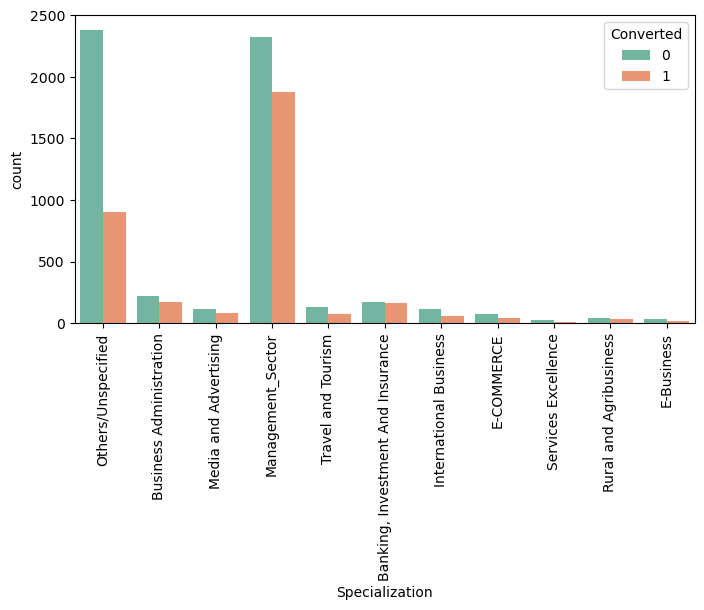

In [748]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x="Specialization",hue="Converted", palette="Set2",data=leads_df)  
plt.show()

In [749]:
leads_df["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [750]:
leads_df["Last Notable Activity"] = leads_df["Last Notable Activity"].replace(['Email Marked Spam', 'Approached upfront',
           'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website','Email Received'], "Other_Notable_Activities")

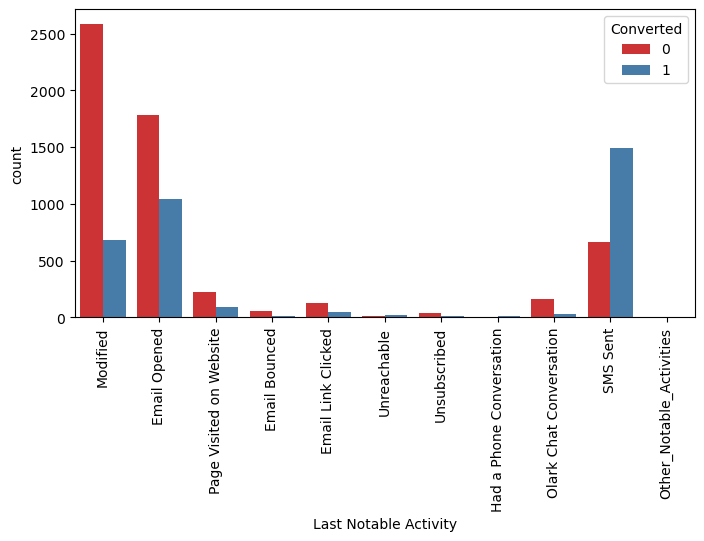

In [751]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
sns.countplot(x="Last Notable Activity",hue="Converted", palette="Set1",data=leads_df)  
plt.show()

In [752]:
numerical_columns_for_analysis = ['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']
print(numerical_columns_for_analysis)
len(numerical_columns_for_analysis)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


3

In [753]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

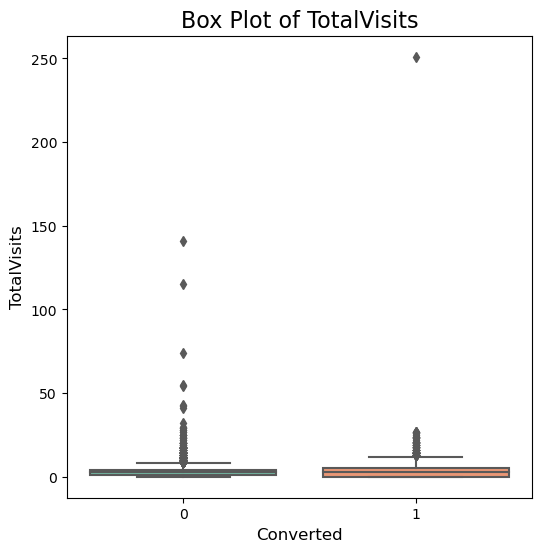

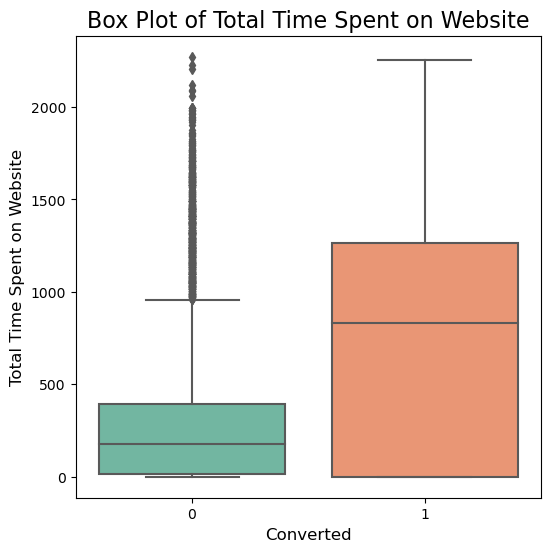

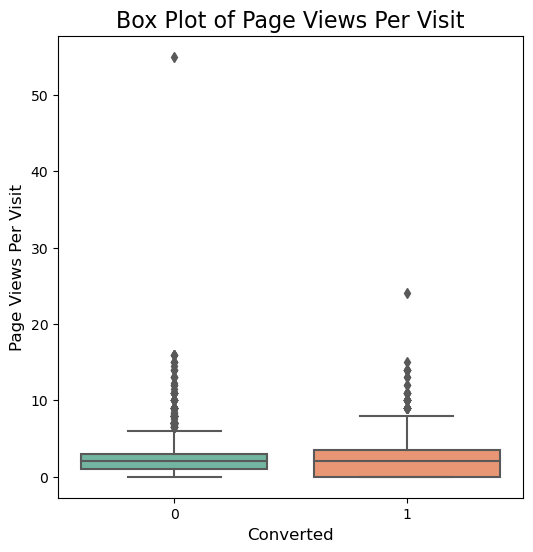

In [754]:
for i in numerical_columns_for_analysis:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='Converted', y=i, data=leads_df, palette='Set2')
    plt.title(f'Box Plot of {i}', fontsize=16)
    plt.xlabel('Converted', fontsize=12)
    plt.ylabel(i, fontsize=12)
    plt.show()

Outliers have been noticed on "TotalVisits" and "Total time spent on website"

# OUTLIER TREATMENT

In [755]:
numerical_columns_for_analysis

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [756]:
numerical_cols = leads_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [757]:
numerical_cols.describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


# BOX PLOTS OF NUMERICAL COLUMNS BEFORE OUTLIER TREATMENT

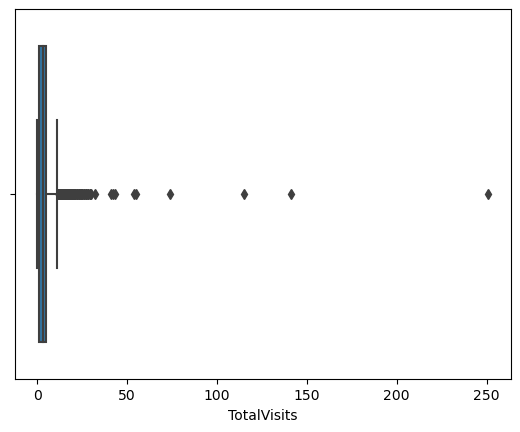

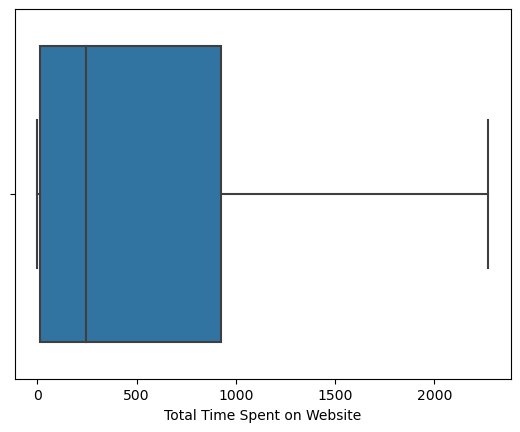

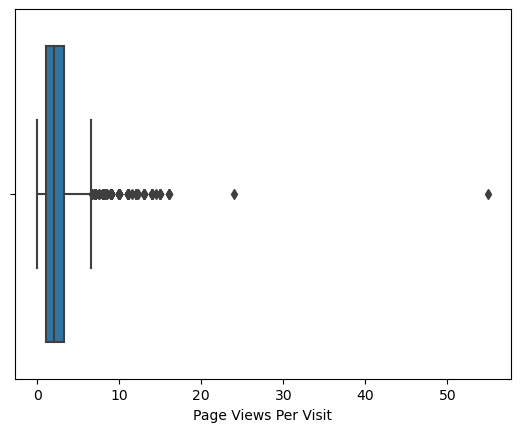

In [758]:
for i in numerical_columns_for_analysis:
    sns.boxplot(x=leads_df[i])
    plt.show()

# All 3 numerical columns have outliers.So, let's do the outlier treatment

In [759]:
Percentiles_1 = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= Percentiles_1[0]] = Percentiles_1[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= Percentiles_1[1]] =Percentiles_1[1]

In [760]:
Percentiles_2 = leads_df['Total Time Spent on Website'].quantile([0.05,0.95]).values
leads_df['Total Time Spent on Website'][leads_df['Total Time Spent on Website'] <= Percentiles_2[0]] = Percentiles_2[0]
leads_df['Total Time Spent on Website'][leads_df['Total Time Spent on Website'] >= Percentiles_2[1]] =Percentiles_2[1]

In [761]:
Percentiles_3 = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= Percentiles_3[0]] = Percentiles_3[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= Percentiles_3[1]] =Percentiles_3[1]

#  BOX PLOTS OF NUMERICAL COLUMNS AFTER OUTLIER-TREATMENT

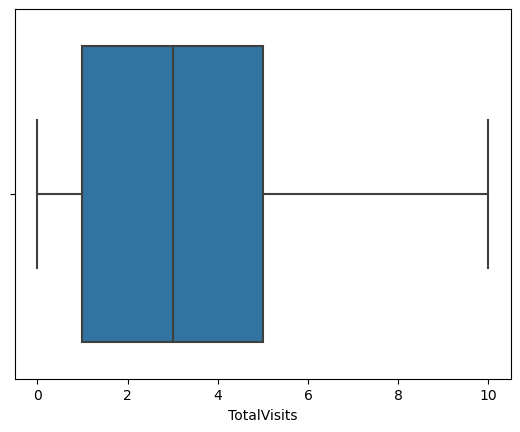

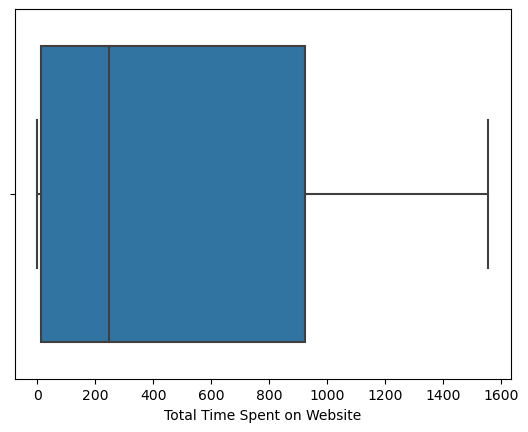

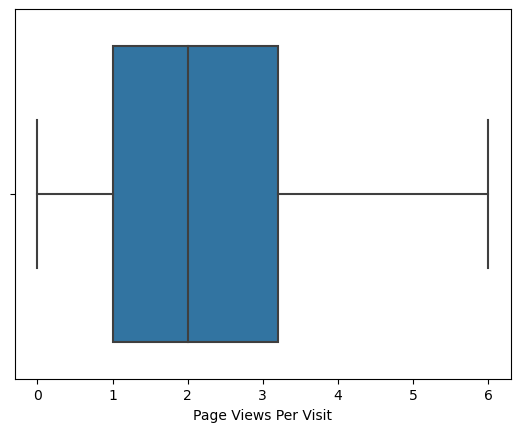

In [762]:
for i in numerical_columns_for_analysis:
    sns.boxplot(x=leads_df[i])
    plt.show()

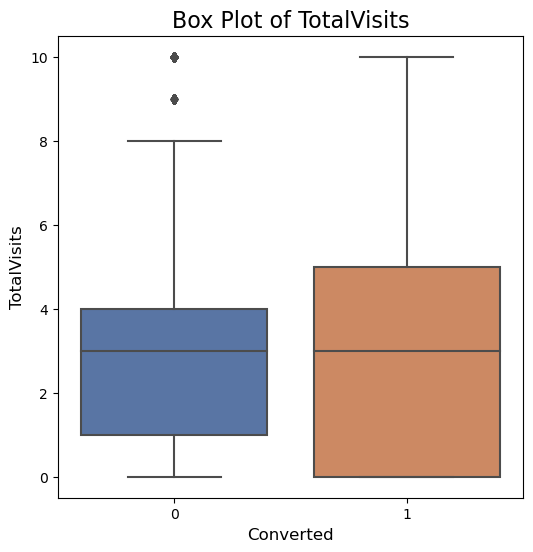

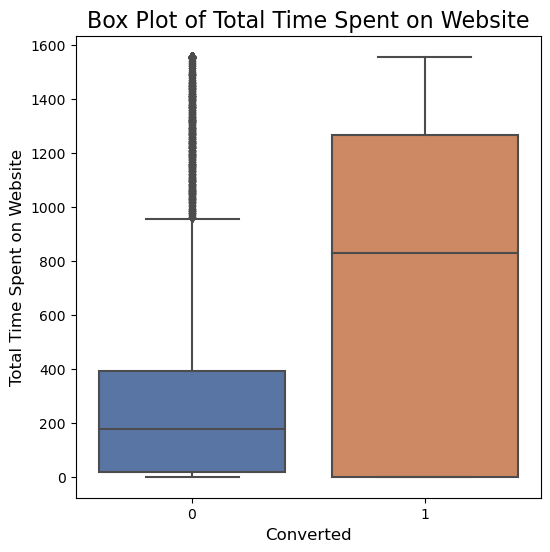

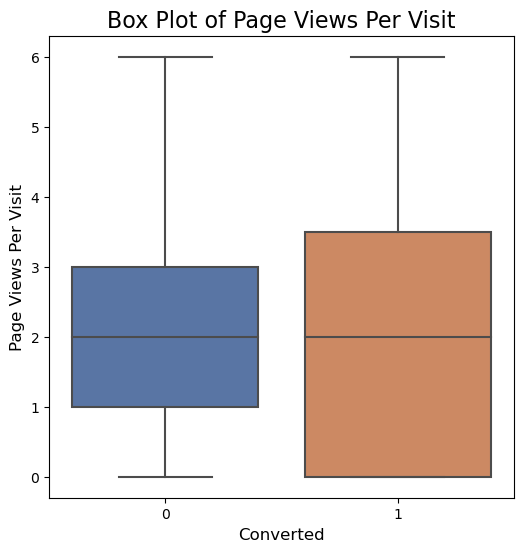

In [763]:
for i in numerical_columns_for_analysis:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='Converted', y=i, data=leads_df, palette='deep')
    plt.title(f'Box Plot of {i}', fontsize=16)
    plt.xlabel('Converted', fontsize=12)
    plt.ylabel(i, fontsize=12)
    plt.show()

Conversion rate is maximum in all numerical varaibles 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' after outlier treatment

Now, The outliers have been drastically reduced after outlier treatment

# HEATMAP GENERATION FOR NUMERICAL COLUMNS

In [887]:
numerical_columns_for_analysis

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [889]:
numerical_cols_df = leads_df[numerical_columns_for_analysis]

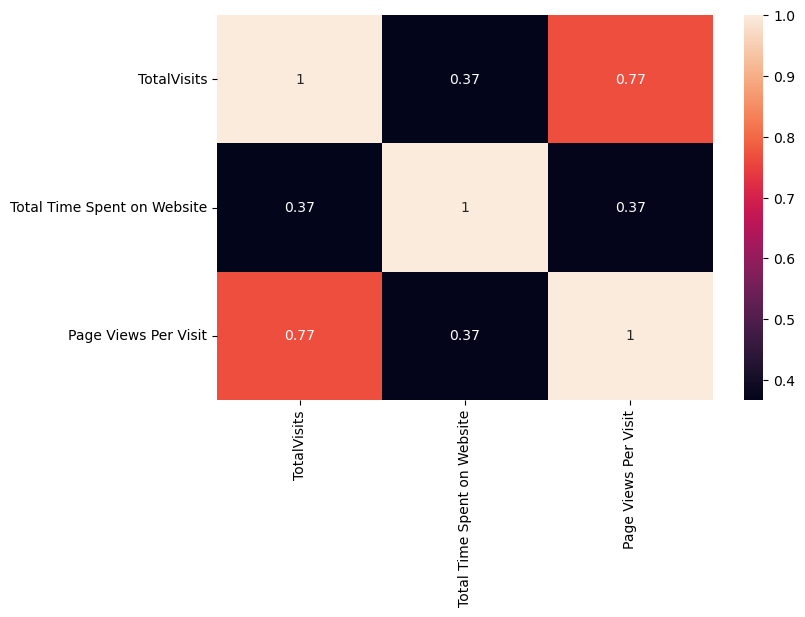

In [890]:
plt.figure(figsize=(8,5))
sns.heatmap(numerical_cols_df.corr(),annot=True)
plt.show()

Higher correlation noticed between 'TotalVisits' and 'Page Views Per Visit' - 0.77
Correlation between 'TotalVisits' and 'Total Time Spent on Website' - 0.37
Correlation between 'Total Time Spent on Website' and 'Page Views Per Visit' - 0.37

In [764]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Dropping some irrelevant/insignificant variables

In [765]:
for values in leads_df.columns:
    unique_values = leads_df[values].unique()
    print(f"Unique values in '{values}':")
    print(unique_values)
    print()  

Unique values in 'Prospect ID':
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

Unique values in 'Lead Number':
[660737 660728 660727 ... 579545 579538 579533]

Unique values in 'Lead Origin':
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

Unique values in 'Lead Source':
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Facebook' 'Others']

Unique values in 'Do Not Email':
['No' 'Yes']

Unique values in 'Do Not Call':
['No' 'Yes']

Unique values in 'Converted':
[0 1]

Unique values in 'TotalVisits':
[ 0.  5.  2.  1.  4.  8. 10.  6.  3.  7.  9.]

Unique values in 'Total Time Spent on Website':
[   0  674 1532 ...  603  483  927]

Unique values in 'Page Views Per Visit':
[0.   2.5  2.   1.   4.   6.   2.67 5.   3.   1.3

# On What basis  i Choosed Unsignificant/Irrelevant variables:


I checked once again the unique values of all variables. For Variables which are having only one values like Either "Yes" or Either "No".I dropped those variables because i need to map binary variables having "Yes" and "No".Here,they have only one values. And some variables without dropping resulted in "NaN" values after binary mapping .So, Again i started binary mapping and before that i dropped columns like 'Prospect ID', 'Lead Number', 'City', 'Country', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Tags', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview'. I dropped location related columns like "City" and "Country" to not have any disruptions in building model.And Dropped "ProspectID" and "Lead Number" as they are unique and i dont want any disruptions in model building.

In [767]:
unsignificant_columns = ['Prospect ID', 'Lead Number',"City","Country","Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","Tags","Newspaper Article","X Education Forums" ,"Newspaper","Digital Advertisement","Through Recommendations" ,"A free copy of Mastering The Interview"]

In [768]:
print(unsignificant_columns)
len(unsignificant_columns)

['Prospect ID', 'Lead Number', 'City', 'Country', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Tags', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


16

In [769]:
leads_df = leads_df.drop(unsignificant_columns,axis=1)

In [770]:
leads_df.shape

(9074, 13)

# DATA PREPARATION

In [771]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others/Unspecified,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others/Unspecified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others/Unspecified,Unemployed,No,Modified


In [772]:
leads_df.shape

(9074, 13)

In [773]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Last Notable Activity'],
      dtype='object')

# Mapping of values In Binary Variables

In [774]:
binary_variables_for_mapping = ['Do Not Email','Do Not Call','Search']

In [775]:
def binary_mapping(x):
    return x.map({'Yes': 1, "No": 0})

leads_df[binary_variables_for_mapping] = leads_df[binary_variables_for_mapping].apply(binary_mapping)

In [776]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others/Unspecified,Unemployed,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others/Unspecified,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others/Unspecified,Unemployed,0,Modified


In [777]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Last Notable Activity'],
      dtype='object')

# DUMMY VARIABLE CREATION

In [778]:
for values in leads_df.columns:
    unique_values = leads_df[values].unique()
    print(f"Unique values in '{values}':")
    print(unique_values)
    print()  

Unique values in 'Lead Origin':
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

Unique values in 'Lead Source':
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Facebook' 'Others']

Unique values in 'Do Not Email':
[0 1]

Unique values in 'Do Not Call':
[0 1]

Unique values in 'Converted':
[0 1]

Unique values in 'TotalVisits':
[ 0.  5.  2.  1.  4.  8. 10.  6.  3.  7.  9.]

Unique values in 'Total Time Spent on Website':
[   0  674 1532 ...  603  483  927]

Unique values in 'Page Views Per Visit':
[0.   2.5  2.   1.   4.   6.   2.67 5.   3.   1.33 1.5  3.5  2.33 5.5
 1.67 4.5  3.33 1.71 1.8  4.33 3.4  1.25 1.75 2.63 2.25 3.67 1.43 2.6
 4.75 1.27 3.25 5.33 2.57 2.17 2.75 2.8  2.2  2.86 3.91 1.4  5.67 3.2
 1.38 2.09 2.4  5.25 3.57 2.22 1.83 3.6  1.2  1.57 1.56 5.4  4.25 1.31
 1.6  2.9  1.23 1.78 3.83 1.14 2.71 1.45 2.38 1.86 2.29 1.21 3.43 2.56
 1.64 4.4  3.17 1.48 1.22 3.75 1.54 2.13 2.14 2.45 3.29 4.17 1.63 3.38

In [779]:
dummy_variables_leads_df = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                            'Last Notable Activity']], drop_first=True)
dummy_variables_leads_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Concatenation of dummy_variables_leads_df with main dataframe leads_df

In [780]:
leads_df = pd.concat([leads_df, dummy_variables_leads_df], axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others/Unspecified,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others/Unspecified,...,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others/Unspecified,...,0,0,0,1,0,0,0,0,0,0


In [781]:
leads_df.shape

(9074, 59)

In [782]:
cols_to_be_remove_after_concatenating = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                            'Last Notable Activity']
print(cols_to_be_remove_after_concatenating)
len(cols_to_be_remove_after_concatenating)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Last Notable Activity']


6

In [783]:
leads_df = leads_df.drop(cols_to_be_remove_after_concatenating,axis=1)

In [784]:
leads_df.shape

(9074, 53)

# MODEL BUILDING

In [785]:
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [786]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [787]:
#allocating target variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [788]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# SCALING

In [789]:
numerical_columns_for_analysis

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [790]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_columns_for_analysis] = scaler.fit_transform(X_train[numerical_columns_for_analysis])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.432779,-0.150296,-0.155018,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.543632,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.904666,-1.265540,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.717578,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.643547,2.053909,0.122613,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [791]:
Conversion_Rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
print(Conversion_Rate)

37.85541106458012


# FEATURE SELECTION USING RFE- RECURSIVE FEATURE ELIMINATION

In [792]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             # Choosed 20 variables
rfe = rfe.fit(X_train, y_train)

In [793]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False])

In [794]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Search', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activities', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activ

In [795]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activities', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others/Unspecified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

# MODEL -1 

In [796]:
import statsmodels.api as sm

In [797]:
X_train_sm_1 = sm.add_constant(X_train[cols])
logm_1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
result_1 = logm1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.1
Date:                Mon, 15 Apr 2024   Deviance:                       5174.2
Time:                        11:07:26   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4720      0.615      0.767      0.443      -0.734       1.678
Do Not Email                                            -1.7745      0.187     -9.491      0.000      -2.141      -1.408
Total Time Spent on Website                              1.1314      0.041     27.900      0.000       1.052       1.211
Lead Origin_Landing Page Submission                     -1.1173      0.129     -8.664      0.000      -1.370      -0.865
Lead Origin_Lead Add Form                                1.5684      0.901      1.740      0.082      -0.198       3.335
Lead Origin_Lead Import                                  1.1404      0.477      2.390      0.017       0.205       2.076
Lead Source_Olark Chat                                   1.2366      0.124      9.936      0.000       0.993       1.481
Lead Source_Reference                                    1.9106      0.925      2.066      0.039       0.098       3.723
Lead Source_Welingak Website                             4.5462      1.157      3.928      0.000       2.278       6.814
Last Activity_Olark Chat Conversation                   -1.3495      0.165     -8.163      0.000      -1.674      -1.026
Last Activity_Other_Activities                           1.5031      0.525      2.866      0.004       0.475       2.531
Last Activity_SMS Sent                                   0.3344      0.141      2.368      0.018       0.058       0.611
Last Activity_Unsubscribed                               1.5802      0.473      3.338      0.001       0.652       2.508
Specialization_Others/Unspecified                       -1.1499      0.125     -9.186      0.000      -1.395      -0.905
What is your current occupation_Housewife               22.0906    1.5e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Student                 -0.4358      0.652     -0.669      0.504      -1.713       0.842
What is your current occupation_Unemployed              -0.9391      0.612     -1.534      0.125      -2.139       0.261
What is your current occupation_Working Professional     1.6854      0.639      2.636      0.008       0.432       2.938
Last Notable Activity_Had a Phone Conversation           2.0843      1.219      1.710      0.087      -0.305       4.474
Last Notable Activity_SMS Sent                           1.3868      0.150      9.266      0.000       1.093       1.680
Last Notable Activity_Unreachable                        1.8612      0.478      3.896      0.000       0.925       2.798
========================================================================================================================
"""

# Checking of VIF - VARIANCE INFLATION FACTOR

In [798]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.66
6,Lead Source_Reference,48.10
7,Lead Source_Welingak Website,15.51
15,What is your current occupation_Unemployed,11.96
2,Lead Origin_Landing Page Submission,7.30
10,Last Activity_SMS Sent,5.40
18,Last Notable Activity_SMS Sent,4.88
12,Specialization_Others/Unspecified,4.64
5,Lead Source_Olark Chat,2.32
16,What is your current occupation_Working Profes...,1.80


# Based on p-value, let's drop "What is your current occupation_Housewife"

In [799]:
cols_1 = cols.drop("What is your current occupation_Housewife")

# Model - 2

In [800]:
X_train_sm_2 = sm.add_constant(X_train[cols_1])
logm_2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
result_2 = logm_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.5
Date:                Mon, 15 Apr 2024   Deviance:                       5179.0
Time:                        11:07:31   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4040
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9760      0.571      1.709      0.087      -0.143       2.095
Do Not Email                                            -1.7790      0.187     -9.508      0.000      -2.146      -1.412
Total Time Spent on Website                              1.1300      0.041     27.891      0.000       1.051       1.209
Lead Origin_Landing Page Submission                     -1.1106      0.129     -8.621      0.000      -1.363      -0.858
Lead Origin_Lead Add Form                                1.5708      0.901      1.743      0.081      -0.195       3.337
Lead Origin_Lead Import                                  1.1425      0.477      2.395      0.017       0.208       2.077
Lead Source_Olark Chat                                   1.2373      0.124      9.941      0.000       0.993       1.481
Lead Source_Reference                                    1.9139      0.925      2.070      0.038       0.102       3.726
Lead Source_Welingak Website                             4.5454      1.157      3.928      0.000       2.277       6.814
Last Activity_Olark Chat Conversation                   -1.3515      0.165     -8.168      0.000      -1.676      -1.027
Last Activity_Other_Activities                           1.5033      0.524      2.866      0.004       0.475       2.531
Last Activity_SMS Sent                                   0.3334      0.141      2.360      0.018       0.057       0.610
Last Activity_Unsubscribed                               1.5840      0.473      3.346      0.001       0.656       2.512
Specialization_Others/Unspecified                       -1.1467      0.125     -9.167      0.000      -1.392      -0.902
What is your current occupation_Student                 -0.9446      0.609     -1.552      0.121      -2.137       0.248
What is your current occupation_Unemployed              -1.4474      0.566     -2.557      0.011      -2.557      -0.338
What is your current occupation_Working Professional     1.1764      0.595      1.977      0.048       0.010       2.343
Last Notable Activity_Had a Phone Conversation           2.0822      1.219      1.708      0.088      -0.307       4.471
Last Notable Activity_SMS Sent                           1.3870      0.150      9.267      0.000       1.094       1.680
Last Notable Activity_Unreachable                        1.8578      0.478      3.885      0.000       0.921       2.795
========================================================================================================================
"""

# Checking VIF

In [801]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_1].values, i) for i in range(X_train[cols_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.65
6,Lead Source_Reference,48.09
7,Lead Source_Welingak Website,15.51
14,What is your current occupation_Unemployed,11.88
2,Lead Origin_Landing Page Submission,7.24
10,Last Activity_SMS Sent,5.40
17,Last Notable Activity_SMS Sent,4.88
12,Specialization_Others/Unspecified,4.62
5,Lead Source_Olark Chat,2.32
15,What is your current occupation_Working Profes...,1.79


# Based on p-value, let's drop "Last Notable Activity_Had a Phone Conversation"

In [803]:
cols_2 = cols_1.drop("Last Notable Activity_Had a Phone Conversation")

# Model-3

In [804]:
X_train_sm_3 = sm.add_constant(X_train[cols_2])
logm_3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
result_3 = logm_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.4
Date:                Mon, 15 Apr 2024   Deviance:                       5182.7
Time:                        11:07:37   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9782      0.571      1.713      0.087      -0.141       2.098
Do Not Email                                            -1.7868      0.187     -9.532      0.000      -2.154      -1.419
Total Time Spent on Website                              1.1284      0.040     27.873      0.000       1.049       1.208
Lead Origin_Landing Page Submission                     -1.1106      0.129     -8.627      0.000      -1.363      -0.858
Lead Origin_Lead Add Form                                1.5691      0.901      1.742      0.082      -0.197       3.335
Lead Origin_Lead Import                                  1.1402      0.477      2.390      0.017       0.205       2.075
Lead Source_Olark Chat                                   1.2343      0.124      9.917      0.000       0.990       1.478
Lead Source_Reference                                    1.9118      0.924      2.068      0.039       0.100       3.723
Lead Source_Welingak Website                             4.5500      1.157      3.932      0.000       2.282       6.818
Last Activity_Olark Chat Conversation                   -1.3486      0.165     -8.150      0.000      -1.673      -1.024
Last Activity_Other_Activities                           2.0561      0.455      4.522      0.000       1.165       2.947
Last Activity_SMS Sent                                   0.3335      0.141      2.362      0.018       0.057       0.610
Last Activity_Unsubscribed                               1.5907      0.473      3.361      0.001       0.663       2.518
Specialization_Others/Unspecified                       -1.1527      0.125     -9.217      0.000      -1.398      -0.908
What is your current occupation_Student                 -0.9439      0.609     -1.551      0.121      -2.137       0.249
What is your current occupation_Unemployed              -1.4463      0.566     -2.555      0.011      -2.556      -0.337
What is your current occupation_Working Professional     1.1715      0.595      1.969      0.049       0.005       2.338
Last Notable Activity_SMS Sent                           1.3866      0.150      9.268      0.000       1.093       1.680
Last Notable Activity_Unreachable                        1.8563      0.478      3.883      0.000       0.919       2.793
========================================================================================================================
"""

# Checking Vif

In [805]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_2].values, i) for i in range(X_train[cols_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.65
6,Lead Source_Reference,48.09
7,Lead Source_Welingak Website,15.51
14,What is your current occupation_Unemployed,11.87
2,Lead Origin_Landing Page Submission,7.24
10,Last Activity_SMS Sent,5.40
16,Last Notable Activity_SMS Sent,4.88
12,Specialization_Others/Unspecified,4.62
5,Lead Source_Olark Chat,2.32
15,What is your current occupation_Working Profes...,1.79


# Based on p-value lets drop "What is your current occupation_Student"

In [807]:
cols_3 = cols_2.drop("What is your current occupation_Student")

# Model-4

In [808]:
X_train_sm_4 = sm.add_constant(X_train[cols_3])
logm_4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
result_4 = logm_4.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.6
Date:                Mon, 15 Apr 2024   Deviance:                       5185.2
Time:                        11:07:40   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1828      0.238      0.769      0.442      -0.283       0.649
Do Not Email                                            -1.7836      0.187     -9.532      0.000      -2.150      -1.417
Total Time Spent on Website                              1.1291      0.040     27.900      0.000       1.050       1.208
Lead Origin_Landing Page Submission                     -1.1219      0.129     -8.729      0.000      -1.374      -0.870
Lead Origin_Lead Add Form                                1.5637      0.901      1.736      0.083      -0.202       3.329
Lead Origin_Lead Import                                  1.1337      0.477      2.375      0.018       0.198       2.069
Lead Source_Olark Chat                                   1.2291      0.124      9.883      0.000       0.985       1.473
Lead Source_Reference                                    1.9156      0.924      2.073      0.038       0.104       3.727
Lead Source_Welingak Website                             4.5538      1.157      3.936      0.000       2.286       6.822
Last Activity_Olark Chat Conversation                   -1.3492      0.165     -8.164      0.000      -1.673      -1.025
Last Activity_Other_Activities                           2.0552      0.455      4.520      0.000       1.164       2.947
Last Activity_SMS Sent                                   0.3333      0.141      2.361      0.018       0.057       0.610
Last Activity_Unsubscribed                               1.5870      0.473      3.353      0.001       0.659       2.515
Specialization_Others/Unspecified                       -1.1625      0.125     -9.307      0.000      -1.407      -0.918
What is your current occupation_Unemployed              -0.6398      0.211     -3.038      0.002      -1.053      -0.227
What is your current occupation_Working Professional     1.9771      0.281      7.046      0.000       1.427       2.527
Last Notable Activity_SMS Sent                           1.3852      0.150      9.258      0.000       1.092       1.678
Last Notable Activity_Unreachable                        1.8604      0.477      3.898      0.000       0.925       2.796
========================================================================================================================
"""

# Checking VIF

In [809]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_3].values, i) for i in range(X_train[cols_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.60
6,Lead Source_Reference,48.08
7,Lead Source_Welingak Website,15.51
13,What is your current occupation_Unemployed,9.41
2,Lead Origin_Landing Page Submission,5.74
10,Last Activity_SMS Sent,5.40
15,Last Notable Activity_SMS Sent,4.87
12,Specialization_Others/Unspecified,3.97
5,Lead Source_Olark Chat,2.24
14,What is your current occupation_Working Profes...,1.64


# Based on p-value and VIF, let's drop "Lead Origin_Lead Add Form"

In [811]:
cols_4 = cols_3.drop("Lead Origin_Lead Add Form")

# Model -5

In [812]:
X_train_sm_5 = sm.add_constant(X_train[cols_4])
logm_5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
result_5 = logm_5.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.2
Date:                Mon, 15 Apr 2024   Deviance:                       5188.5
Time:                        11:07:45   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2008      0.238      0.845      0.398      -0.265       0.666
Do Not Email                                            -1.7852      0.187     -9.540      0.000      -2.152      -1.418
Total Time Spent on Website                              1.1267      0.040     27.885      0.000       1.048       1.206
Lead Origin_Landing Page Submission                     -1.1410      0.128     -8.901      0.000      -1.392      -0.890
Lead Origin_Lead Import                                  1.1160      0.477      2.337      0.019       0.180       2.052
Lead Source_Olark Chat                                   1.2211      0.124      9.838      0.000       0.978       1.464
Lead Source_Reference                                    3.4637      0.243     14.239      0.000       2.987       3.940
Lead Source_Welingak Website                             6.1080      0.734      8.326      0.000       4.670       7.546
Last Activity_Olark Chat Conversation                   -1.3536      0.165     -8.191      0.000      -1.677      -1.030
Last Activity_Other_Activities                           2.0505      0.455      4.511      0.000       1.160       2.942
Last Activity_SMS Sent                                   0.3308      0.141      2.343      0.019       0.054       0.607
Last Activity_Unsubscribed                               1.5854      0.473      3.351      0.001       0.658       2.513
Specialization_Others/Unspecified                       -1.1753      0.125     -9.418      0.000      -1.420      -0.931
What is your current occupation_Unemployed              -0.6370      0.211     -3.024      0.002      -1.050      -0.224
What is your current occupation_Working Professional     1.9765      0.281      7.042      0.000       1.426       2.527
Last Notable Activity_SMS Sent                           1.3886      0.150      9.282      0.000       1.095       1.682
Last Notable Activity_Unreachable                        1.8556      0.477      3.888      0.000       0.920       2.791
========================================================================================================================
"""

# Checking VIF

In [813]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_4].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_4].values, i) for i in range(X_train[cols_4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.37
2,Lead Origin_Landing Page Submission,5.72
9,Last Activity_SMS Sent,5.40
14,Last Notable Activity_SMS Sent,4.87
11,Specialization_Others/Unspecified,3.97
4,Lead Source_Olark Chat,2.24
13,What is your current occupation_Working Profes...,1.64
5,Lead Source_Reference,1.46
7,Last Activity_Olark Chat Conversation,1.46
1,Total Time Spent on Website,1.34


# Based on VIF, let's drop "What is your current occupation_Unemployed"

In [815]:
cols_5 = cols_4.drop("What is your current occupation_Unemployed")

# Model -6

In [816]:
X_train_sm_6 = sm.add_constant(X_train[cols_5])
logm_6 = sm.GLM(y_train,X_train_sm_6, family = sm.families.Binomial())
result_6 = logm_6.fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.7
Date:                Mon, 15 Apr 2024   Deviance:                       5197.3
Time:                        11:07:49   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4091      0.125     -3.280      0.001      -0.654      -0.165
Do Not Email                                            -1.7810      0.187     -9.512      0.000      -2.148      -1.414
Total Time Spent on Website                              1.1265      0.040     27.905      0.000       1.047       1.206
Lead Origin_Landing Page Submission                     -1.1434      0.128     -8.910      0.000      -1.395      -0.892
Lead Origin_Lead Import                                  1.0974      0.477      2.299      0.022       0.162       2.033
Lead Source_Olark Chat                                   1.2280      0.124      9.895      0.000       0.985       1.471
Lead Source_Reference                                    3.4773      0.243     14.318      0.000       3.001       3.953
Lead Source_Welingak Website                             6.0988      0.733      8.315      0.000       4.661       7.536
Last Activity_Olark Chat Conversation                   -1.3489      0.165     -8.174      0.000      -1.672      -1.025
Last Activity_Other_Activities                           2.0284      0.455      4.462      0.000       1.137       2.919
Last Activity_SMS Sent                                   0.3116      0.141      2.213      0.027       0.036       0.588
Last Activity_Unsubscribed                               1.5588      0.473      3.296      0.001       0.632       2.486
Specialization_Others/Unspecified                       -1.1864      0.125     -9.487      0.000      -1.432      -0.941
What is your current occupation_Working Professional     2.5924      0.194     13.385      0.000       2.213       2.972
Last Notable Activity_SMS Sent                           1.3923      0.149      9.319      0.000       1.099       1.685
Last Notable Activity_Unreachable                        1.8400      0.476      3.867      0.000       0.907       2.773
========================================================================================================================
"""

# Checking VIF

In [817]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_5].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_5].values, i) for i in range(X_train[cols_5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,5.34
13,Last Notable Activity_SMS Sent,4.87
4,Lead Source_Olark Chat,2.05
11,Specialization_Others/Unspecified,2.00
7,Last Activity_Olark Chat Conversation,1.45
2,Lead Origin_Landing Page Submission,1.43
1,Total Time Spent on Website,1.32
5,Lead Source_Reference,1.24
12,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.18


# Based on VIF, let's drop "Last Activity_SMS Sent"

In [819]:
cols_6 = cols_5.drop("Last Activity_SMS Sent")

# Model-7

In [820]:
X_train_sm_7 = sm.add_constant(X_train[cols_6])
logm_7 = sm.GLM(y_train,X_train_sm_7, family = sm.families.Binomial())
result_7 = logm_7.fit()
result_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.1
Date:                Mon, 15 Apr 2024   Deviance:                       5202.2
Time:                        11:07:53   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3820      0.124     -3.080      0.002      -0.625      -0.139
Do Not Email                                            -1.7696      0.187     -9.462      0.000      -2.136      -1.403
Total Time Spent on Website                              1.1269      0.040     27.927      0.000       1.048       1.206
Lead Origin_Landing Page Submission                     -1.1397      0.128     -8.885      0.000      -1.391      -0.888
Lead Origin_Lead Import                                  1.1145      0.476      2.339      0.019       0.181       2.048
Lead Source_Olark Chat                                   1.2213      0.124      9.858      0.000       0.978       1.464
Lead Source_Reference                                    3.4987      0.243     14.392      0.000       3.022       3.975
Lead Source_Welingak Website                             6.1438      0.735      8.361      0.000       4.704       7.584
Last Activity_Olark Chat Conversation                   -1.3775      0.164     -8.377      0.000      -1.700      -1.055
Last Activity_Other_Activities                           1.9970      0.454      4.396      0.000       1.107       2.887
Last Activity_Unsubscribed                               1.5181      0.472      3.213      0.001       0.592       2.444
Specialization_Others/Unspecified                       -1.1794      0.125     -9.438      0.000      -1.424      -0.934
What is your current occupation_Working Professional     2.5841      0.194     13.352      0.000       2.205       2.963
Last Notable Activity_SMS Sent                           1.6722      0.081     20.721      0.000       1.514       1.830
Last Notable Activity_Unreachable                        1.8093      0.476      3.805      0.000       0.877       2.741
========================================================================================================================
"""

# Checking VIF

In [821]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_6].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_6].values, i) for i in range(X_train[cols_6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,2.05
10,Specialization_Others/Unspecified,1.96
7,Last Activity_Olark Chat Conversation,1.44
12,Last Notable Activity_SMS Sent,1.42
2,Lead Origin_Landing Page Submission,1.35
1,Total Time Spent on Website,1.32
5,Lead Source_Reference,1.22
11,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.18
6,Lead Source_Welingak Website,1.09


p-values and VIF are stabilised properly. P-values kept below 0.05 and VIF <5 

# PREDICTIONS ON TRAIN DATA SET

In [822]:
# Getting the predicted values on the train set
y_train_pred = result_7.predict(X_train_sm_7)
y_train_pred[:10]

3009    0.155647
1012    0.075917
9226    0.204317
4750    0.889547
7987    0.688470
1281    0.775242
2880    0.073609
4971    0.971525
7536    0.688470
1248    0.660270
dtype: float64

Re-shaping into an Array

In [823]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15564728, 0.07591749, 0.20431662, 0.88954667, 0.68846998,
       0.77524156, 0.07360932, 0.97152505, 0.68846998, 0.66026955])

In [824]:
# Creation of dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.155647,3009
1,0,0.075917,1012
2,0,0.204317,9226
3,1,0.889547,4750
4,1,0.688470,7987


Creation of new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [825]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.155647,3009,0
1,0,0.075917,1012,0
2,0,0.204317,9226,0
3,1,0.889547,4750,1
4,1,0.688470,7987,1


# Let's Make Confusion Matrix

In [826]:
from sklearn import metrics

In [827]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_matrix)

[[3437  468]
 [ 717 1729]]


The confusion matrix indicates as below

Predicted     not_converted    converted

Actual

not_converted        3437      468

converted            717       1729

# ACCURACY FOR OUR MODEL

In [828]:
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(Accuracy)

0.8134152102031176


In [829]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

# SENSITIVITY 

In [830]:
Sensitivity = TP / float(TP+FN)
print(Sensitivity)

0.7068683565004088


# SPECIFICITY

In [831]:
Specificity = TN / float(TN+FP)
print(Specificity )

0.8801536491677336


# False Positive Rate

In [832]:
False_positive_rate = FP/ float(TN+FP)
print(False_positive_rate)

0.11984635083226633


# Positive Predictive value

In [833]:
positive_predictive_value = TP / float(TP+FP)
print(positive_predictive_value)

0.7869822485207101


# Negative predictive value

In [834]:
negative_predictive_value = TN / float(TN+ FN)
print(negative_predictive_value)

0.827395281656235


Specificity was good (~88.01%) but Sensitivity was only 70.68%.

We have got sensitivity of 70.68% and this is due to the cut-off point of 0.5. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.


# Let's Plot ROC Curve - Receiver Operating Characteristic Curve

In [835]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [836]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

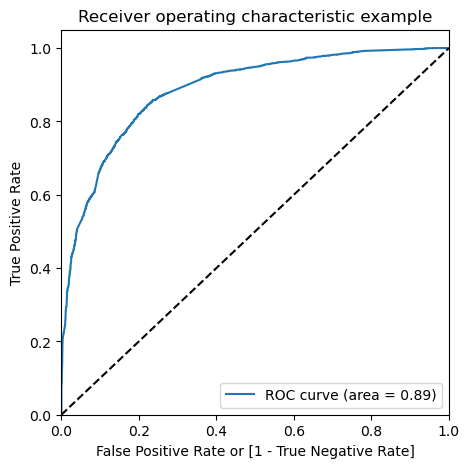

In [837]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Higher the curve area (0.89), Our Model is a Good one.

# OPTIMAL CUT-OFF POINT

In [838]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.155647,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.075917,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.204317,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.889547,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.688470,7987,1,1,1,1,1,1,1,1,0,0,0


In [839]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

In [840]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.615651     0.966067     0.396159
0.2          0.2  0.745237     0.917825     0.637132
0.3          0.3  0.801606     0.847915     0.772599
0.4          0.4  0.810738     0.780049     0.829962
0.5          0.5  0.813415     0.706868     0.880154
0.6          0.6  0.796567     0.600572     0.919334
0.7          0.7  0.784286     0.504906     0.959283
0.8          0.8  0.766966     0.440720     0.971319
0.9          0.9  0.719572     0.290679     0.988220


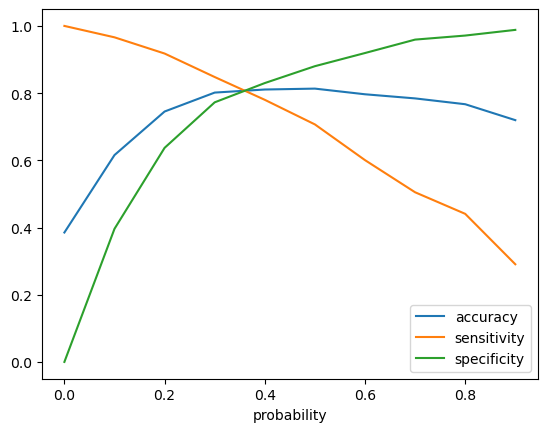

In [841]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

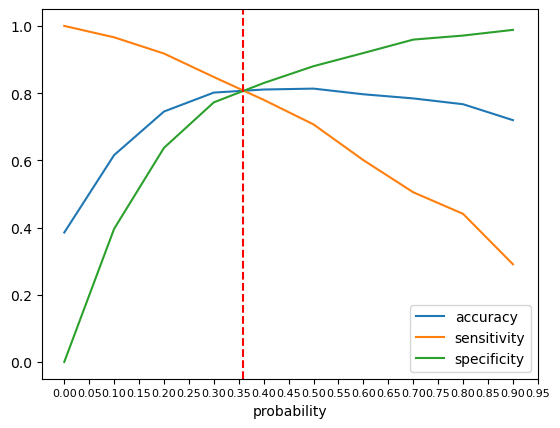

In [842]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

In [843]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.155647,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.075917,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.204317,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.889547,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.688470,7987,1,1,1,1,1,1,1,1,0,0,0,1


# Assigning the Lead Score to Train Data

In [844]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.155647,3009,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.075917,1012,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.204317,9226,0,1,1,1,0,0,0,0,0,0,0,0,20
3,1,0.889547,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.688470,7987,1,1,1,1,1,1,1,1,0,0,0,1,69


# MODEL EVALUATION 

In [845]:
#Importing 'metrics' library:-

from sklearn import metrics

# Confusion matrix:-

confusion_matrix_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3437  468]
 [ 717 1729]]


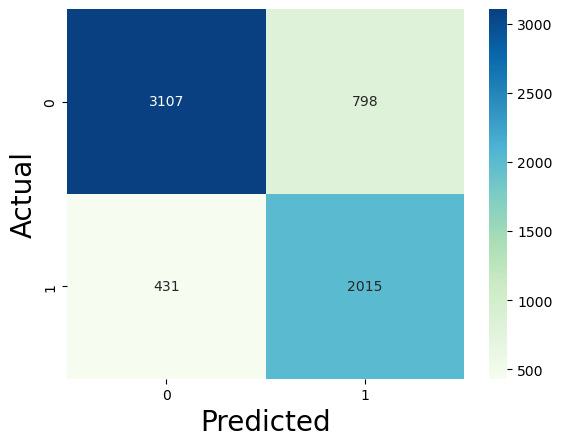

In [846]:
#Importing library to plot confusion matrix:-
#from sklearn.metrics import plot_confusion_matrix

# Plotting confusion matrix:-
sns.heatmap(confusion_matrix_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [847]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8064871673752165


In [848]:
TP = confusion_matrix_2[1,1] # true positive
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

In [849]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8237939493049877


In [850]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7956466069142125


In [851]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.20435339308578745


In [852]:
# Positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7163170991823676


In [853]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8781797625777276


# PRECISION AND RECALL

In [854]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3437,  468],
       [ 717, 1729]], dtype=int64)

In [855]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7869822485207101


In [856]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7068683565004088


In [857]:
# Using sklearn utilities
from sklearn.metrics import precision_score, recall_score

In [858]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7869822485207101


In [859]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7068683565004088


# PRECISION AND RECALL TRADE OFF

In [860]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [861]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

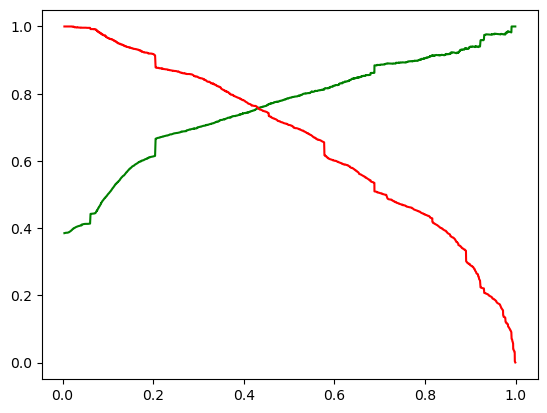

In [862]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# MAKING OF PREDICTIONS ON TEST DATASET

In [863]:
X_test[numerical_columns_for_analysis] = scaler.transform(X_test[numerical_columns_for_analysis])

In [864]:
X_test = X_test[cols_6]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Unsubscribed,Specialization_Others/Unspecified,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3271,0,-0.606338,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.970301,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.764053,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.904666,0,0,0,1,0,0,0,0,0,0,0,0
3830,0,-0.593037,1,0,0,0,0,0,0,0,0,0,0,0


In [865]:
# Adding a const
X_test_sm_7 = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result_7.predict(X_test_sm)
y_test_pred[:10]

3271    0.095813
1490    0.963835
7936    0.081483
4216    0.890635
3830    0.100660
1800    0.551251
6507    0.356016
4821    0.253374
4223    0.930216
4714    0.204317
dtype: float64

In [866]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [867]:
y_pred_1.head()

,0
3271,0.095813
1490,0.963835
7936,0.081483
4216,0.890635
3830,0.100660


In [868]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [869]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [870]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [871]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [872]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.095813
1,1,1490,0.963835
2,0,7936,0.081483
3,1,4216,0.890635
4,0,3830,0.100660


In [873]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [874]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [875]:
y_pred_final.head()



,Prospect ID,Converted,Converted_prob
0,3271,0,0.095813
1,1490,1,0.963835
2,7936,0,0.081483
3,4216,1,0.890635
4,3830,0,0.100660


In [876]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [877]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.095813,0
1,1490,1,0.963835,1
2,7936,0,0.081483,0
3,4216,1,0.890635,1
4,3830,0,0.100660,0


In [878]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8053617333822989


In [879]:
# Making the confusion matrix
confusion_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_3

array([[1383,  351],
       [ 179,  810]], dtype=int64)

In [880]:
TP = confusion_3[1,1] # true positive
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

In [881]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8190091001011123


In [882]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7975778546712803


# Assigning of  Lead Score to the Testing data

In [883]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.095813,0,10
1,1490,1,0.963835,1,96
2,7936,0,0.081483,0,8
3,4216,1,0.890635,1,89
4,3830,0,0.100660,0,10


# OBSERVATIONS

After running the model on the Test Data , we obtain:

Accuracy : 80.53 %

Sensitivity : 81.90 %

Specificity : 79.75%

# COMPARSION OF TRAIN AND TEST DATA

 TRAIN DATA 
Accuracy : 80.68 %

Sensitivity :82.37%

Specificity :79.56%

TEST DATA
Accuracy : 80.53 %

Sensitivity : 81.90 %

Specificity : 79.75%

# OBSERVATION

 "Lead Source_Welingak Website" (coef = 6.1438): This feature has the highest positive coefficient, suggesting that leads originating from the Welingak Website have a strong positive impact on the predicted outcome.

"Lead Source_Reference" (coef = 3.4987): Leads from reference sources also have a significant positive impact on the outcome.

" What is your current occupation_Working Professional" (coef = 2.5841): The occupation being a "Working Professional" is positively associated with the predicted outcome.

"Last Notable Activity_SMS Sent" (coef = 1.6722): Sending an SMS as the last notable activity is positively correlated with the predicted outcome.

"Last Notable Activity_Unreachable" (coef = 1.8093): The activity being marked as "Unreachable" in the last notable activity is also positively correlated with the outcome.

"Total Time Spent on Website" (coef = 1.1269): The time spent on the website by the lead has a moderate positive impact on the outcome.

"Lead Source_Olark Chat" (coef = 1.2213): Leads originating from Olark Chat also contribute positively to the predicted outcome.

Focus on these features to get maximum rate of conversion

# FINDING THE HOT LEADS

In [892]:
Hot_Leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
Hot_Leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.963835,1,96
3,4216,1,0.890635,1,89
8,4223,1,0.930216,1,93
16,1946,1,0.937389,1,94
21,2461,1,0.994702,1,99
...,...,...,...,...,...
2694,1566,1,0.937050,1,94
2699,6461,1,0.967680,1,97
2703,5741,1,0.921661,1,92
2715,6299,1,0.892343,1,89


In [893]:
print(" Prospect ID of the Leads to be contacted are :")

Hot_Leads_IDs = Hot_Leads["Prospect ID"].values.reshape(-1)
Hot_Leads_IDs

 Prospect ID of the Leads to be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 4959, 2010, 4062, 7696,
       9049, 4543, 4830, 4365, 3542, 7347, 2504, 7674, 8596, 4003, 4963,
       6947, 4807,  446,  789, 8372, 5805, 3758, 1561,  737, 9034, 6423,
       8286, 7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253,
       4297, 5490, 1995, 6532, 4498, 5797, 8687,  831, 7653, 4149, 2018,
        243, 6743, 3307, 3976, 5769, 1663, 3288, 6557, 8959, 7521, 8282,
       8213, 9063, 5292, 6913, 6015, 1481,  785, 3265, 3285, 7433, 2460,
       3858, 3810, 2009, 8106,  373, 3055, 7417, 4179, 8076, 4994, 8568,
       7268, 4353, 6784, 6754, 7236, 5725, 2960, 3983, 4487,  802, 8745,
       4717,  505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157,
       3827, 7175, 1675, 6999, 5932, 5826, 8492, 6499, 2481, 3439, 4612,
       7468, 7129, 4793, 1557, 4837, 2495,  822, 8111, 2378, 5090, 5075,
        855, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961, 1542, 5656,
       2630, 6728, 8205, 6332, 8461, 2427, 5087,  1